 # Midterm Project Notebook 
by: Jessica Arriola 

# Research Question:How does educational attainment impact poverty levels across different demographic groups?

My research will evaluate the relationship between educational attainment and its impact on poverty levels among different demographic groups. I will explore different socioeconomic characterics suchs as race, income levels, and educational attainment among the Los Angeles County population. This notebook will focus on race, educational attainment and income levels. 

# Datasources 



# Importing Libraries 

In [5]:
# I will be using pandas for data exploration 
import pandas as pd
import geopandas as gpd


In [6]:
# First, install the missing package
!pip install contextily

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

# importing for interactive plots 
import plotly.express as px

In [7]:
# I will be importing LACOUNTYTRACTS24
censustracts=gpd.read_file('LACountyTracts24.zip')

In [11]:
# getting the rows and columns 
censustracts.shape


(2533, 206)

In [12]:
censustracts.head()

ID          NAME  STATE_NAME ST_ABBREV      AREA  TOTPOP_CY  \
0  06037262302  060372623.02  California        CA  1.182838       2782   
1  06037206201  060372062.01  California        CA  0.077543       2863   
2  06037128102  060371281.02  California        CA  0.250507       4755   
3  06037131701  060371317.01  California        CA  0.254699       4591   
4  06037232800  060372328.00  California        CA  0.164729       3927   

   HHPOP_CY  GQPOP_CY  POPDENS_CY  TOTHH_CY  ...  NHSPWHT__1  NHSPBLK__1  \
0      2765        17      2352.0      1141  ...   79.295471    1.042416   
1      2202       661     36941.9      1262  ...   20.852253   16.590988   
2      4521       234     18982.0      1479  ...   18.401682    5.005258   
3      4575        16     18025.1      1741  ...   23.175779    5.968199   
4      3858        69     23843.4       968  ...    0.993125   12.554113   

   NHSPAI_CY_  NHSPASN__1  NHSPPI_CY_  NHSPOTH__1  NHSPMLT__1  HSGRAD_LES  \
0    0.000000    6.506111    0.000000    1.006470    5.140187    0.824043   
1    1.012924   28.815927    0.419141    0.838282    4.680405    9.677419   
2    0.042061    5.615142    0.147213    0.672976    1.451104   25.774135   
3    0.174254   21.367894    0.043563    0.588107    3.724679   17.841079   
4    0.254647    0.611154    0.000000    0.891266    1.120448   43.775763   

   BACHDEG_PL                                           geometry  
0   83.131362  POLYGON ((-13187629.788 4038588.873, -13187642...  
1   45.822994  POLYGON ((-13162511.881 4035572.196, -13162582...  
2   17.941712  POLYGON ((-13184678.486 4053894.2, -13184921.4...  
3   34.002999  POLYGON ((-13197317.144 4055820.492, -13197556...  
4   10.634790  POLYGON ((-13166681.241 4028231.101, -13166681...  

[5 rows x 206 columns]

# Cleaning Up the Data 

In [9]:
# selecting the columns I want to keep 
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']

In [10]:
# creating a new dataframe with the columns i want to keep 
tractsCleaned = censustracts[columns_to_keep]

In [98]:
# renaming the columns I want to keep
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

In [17]:
# checking to make sure the columns were renamed
tractsCleaned.head()

FIPS  HISPANIC  WHITE  BLACK  AMERICAN INDIAN  ASIAN  DIVERSITY  \
0  06037262302       195   2206     29                0    181       41.7   
1  06037206201       767    597    475               29    825       87.0   
2  06037128102      3265    875    238                2    267       82.8   
3  06037131701      2064   1064    274                8    981       88.5   
4  06037232800      3282     39    493               10     24       71.7   

   NOHS  SOMEHS  HSGRAD  ...  LESS15  15-24  25-34  35-49  50-74  75-99  \
0    17       0      62  ...     100      0     55     16     34     56   
1    23     211     367  ...     347    173     67    124     68     83   
2   606     243     915  ...      73    156    143    227    319    194   
3   309     286     747  ...     104    138    101    113    217    203   
4   797     265     572  ...     170    138    100     77     87    101   

   100-149  150-199  200MORE  \
0      136       84      660   
1      138      171       91   
2      249       88       30   
3      398      138      329   
4      154       80       61   

                                            geometry  
0  POLYGON ((-13187629.788 4038588.873, -13187642...  
1  POLYGON ((-13162511.881 4035572.196, -13162582...  
2  POLYGON ((-13184678.486 4053894.2, -13184921.4...  
3  POLYGON ((-13197317.144 4055820.492, -13197556...  
4  POLYGON ((-13166681.241 4028231.101, -13166681...  

[5 rows x 26 columns]

In [19]:
tractsCleaned.columns.to_list()

['FIPS',
 'HISPANIC',
 'WHITE',
 'BLACK',
 'AMERICAN INDIAN',
 'ASIAN',
 'DIVERSITY',
 'NOHS',
 'SOMEHS',
 'HSGRAD',
 'GED',
 'SOMECOLL',
 'ASSDEG',
 'BACH',
 'GRAD',
 'EDUCBASE',
 'LESS15',
 '15-24',
 '25-34',
 '35-49',
 '50-74',
 '75-99',
 '100-149',
 '150-199',
 '200MORE',
 'geometry']

In [20]:
tractsCleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   FIPS             2533 non-null   object  
 1   HISPANIC         2533 non-null   int64   
 2   WHITE            2533 non-null   int64   
 3   BLACK            2533 non-null   int64   
 4   AMERICAN INDIAN  2533 non-null   int64   
 5   ASIAN            2533 non-null   int64   
 6   DIVERSITY        2533 non-null   float64 
 7   NOHS             2533 non-null   int64   
 8   SOMEHS           2533 non-null   int64   
 9   HSGRAD           2533 non-null   int64   
 10  GED              2533 non-null   int64   
 11  SOMECOLL         2533 non-null   int64   
 12  ASSDEG           2533 non-null   int64   
 13  BACH             2533 non-null   int64   
 14  GRAD             2533 non-null   int64   
 15  EDUCBASE         2533 non-null   int64   
 16  LESS15           2533 non-null   i

In [21]:
tractsCleaned.describe()

HISPANIC        WHITE        BLACK  AMERICAN INDIAN        ASIAN  \
count  2533.000000  2533.000000  2533.000000      2533.000000  2533.000000   
mean   1912.333597   959.699171   287.457560         7.103829   598.900908   
std    1321.468980   986.664479   456.497764         6.872504   725.789841   
min       0.000000     0.000000     0.000000         0.000000     0.000000   
25%     785.000000   171.000000    55.000000         3.000000   147.000000   
50%    1713.000000   585.000000   130.000000         5.000000   366.000000   
75%    2807.000000  1501.000000   304.000000        10.000000   733.000000   
max    7303.000000  8753.000000  4690.000000        89.000000  5901.000000   

         DIVERSITY         NOHS       SOMEHS       HSGRAD          GED  ...  \
count  2533.000000  2533.000000  2533.000000  2533.000000  2533.000000  ...   
mean     75.357442   290.361627   194.931307   531.593762    58.018950  ...   
std      12.080802   265.344294   161.133130   301.745829    51.187861  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      68.400000    65.000000    65.000000   308.000000    19.000000  ...   
50%      79.100000   221.000000   162.000000   501.000000    47.000000  ...   
75%      84.600000   453.000000   289.000000   716.000000    83.000000  ...   
max      90.100000  1571.000000  1534.000000  1987.000000   454.000000  ...   

           EDUCBASE       LESS15        15-24        25-34        35-49  \
count   2533.000000  2533.000000  2533.000000  2533.000000  2533.000000   
mean    2792.352941   122.585077    80.701145    81.739834   115.664430   
std     1010.214120   103.182232    58.730436    52.964665    69.562509   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     2132.000000    55.000000    37.000000    43.000000    65.000000   
50%     2704.000000    97.000000    70.000000    72.000000   106.000000   
75%     3383.000000   161.000000   108.000000   111.000000   156.000000   
max    11072.000000  1087.000000   499.000000   569.000000   549.000000   

             50-74        75-99      100-149      150-199      200MORE  
count  2533.000000  2533.000000  2533.000000  2533.000000  2533.000000  
mean    189.564153   168.043822   240.512041   146.752862   234.399131  
std      97.979745    89.246322   134.776600   104.201923   245.669171  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%     121.000000   109.000000   149.000000    74.000000    61.000000  
50%     174.000000   154.000000   219.000000   128.000000   152.000000  
75%     244.000000   214.000000   313.000000   200.000000   333.000000  
max     697.000000   763.000000  2017.000000  1069.000000  2569.000000  

[8 rows x 24 columns]

<Axes: >

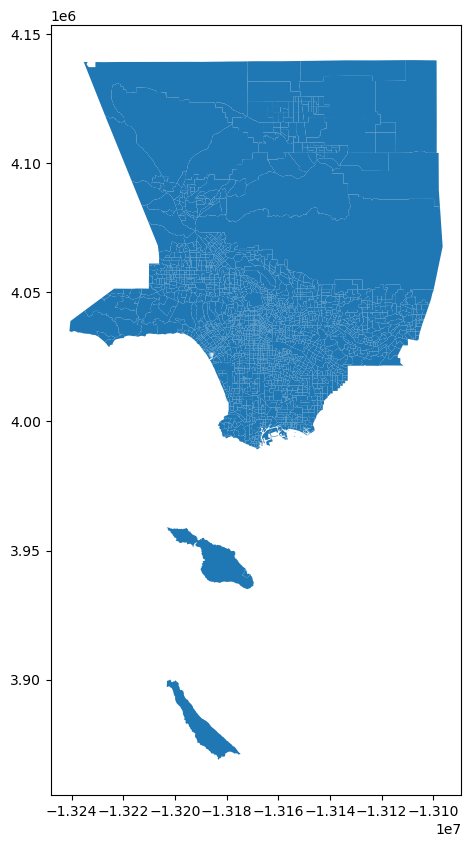

In [22]:
# plot census tracts 
tractsCleaned.plot(figsize=(12,10))

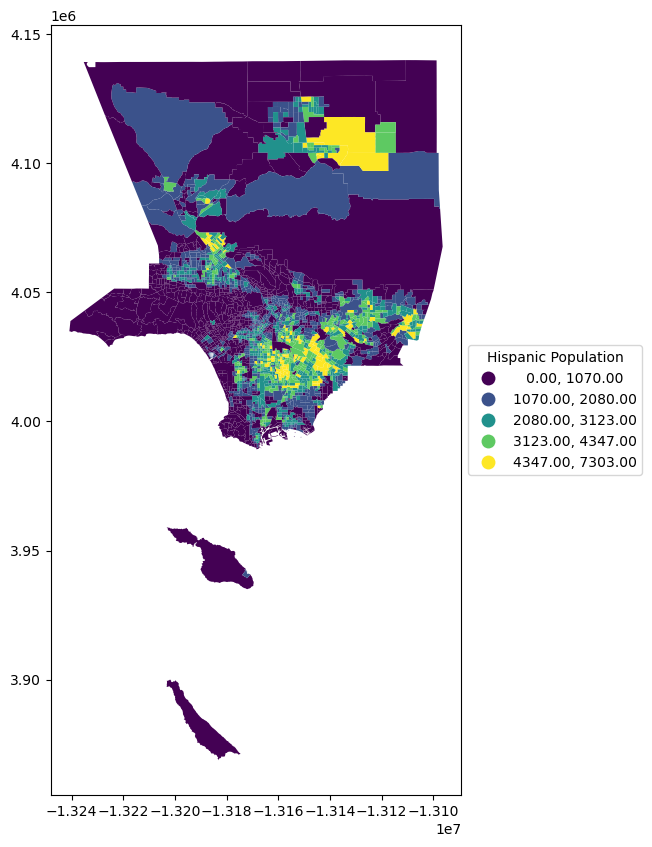

In [25]:
# Hispanic Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='HISPANIC',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Hispanic Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('HISPANIC.png')


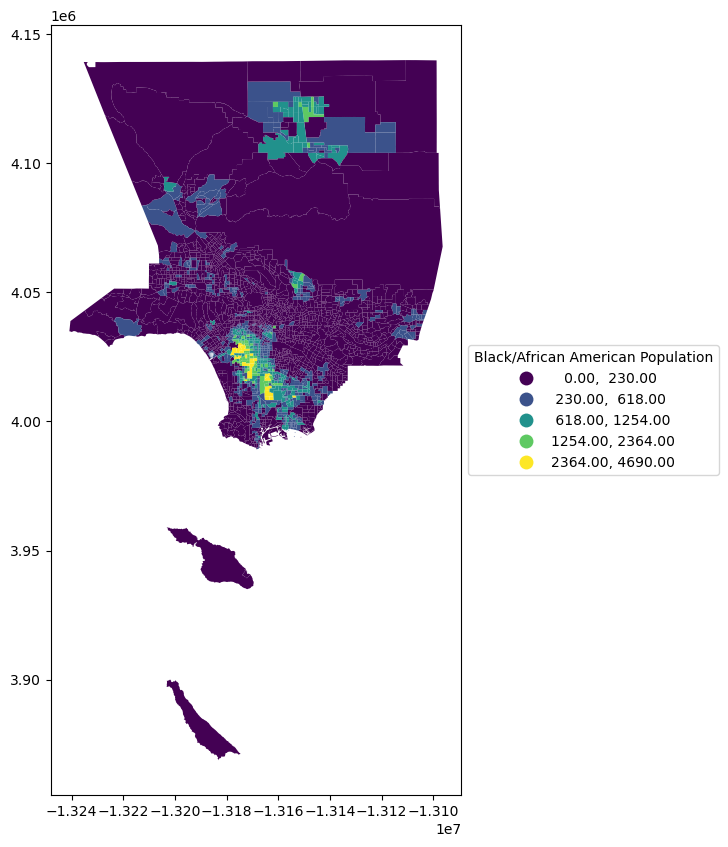

In [30]:
# Black/ African American Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='BLACK',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Black/African American Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('BLACK1.png')

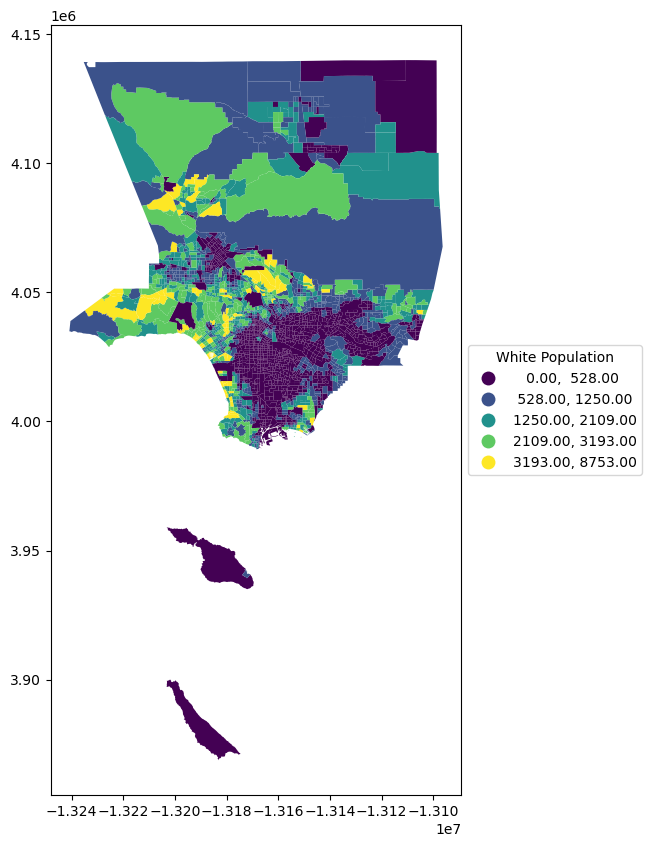

In [27]:
# White American Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='WHITE',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'White Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('White.png')

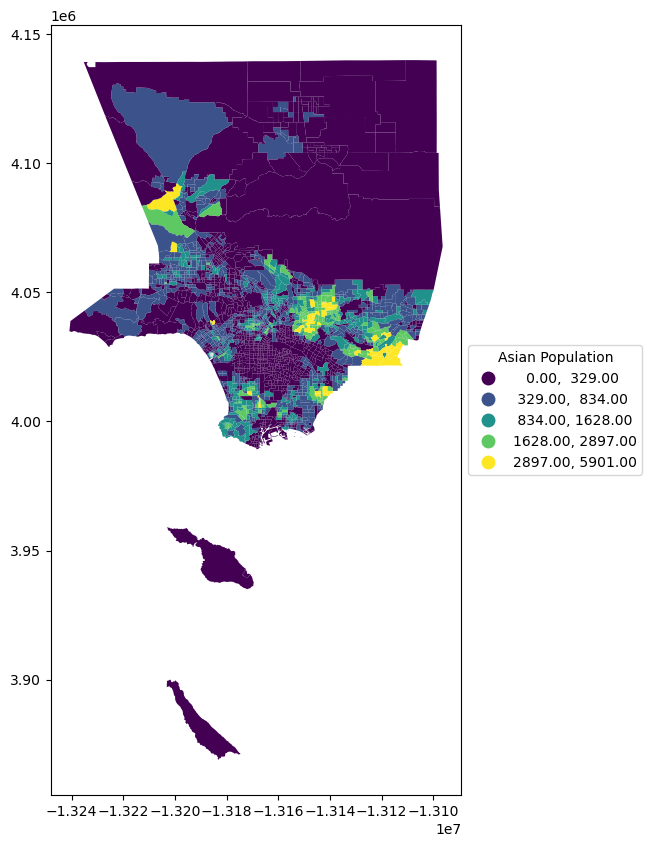

In [34]:
# Aisan Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='ASIAN',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'Asian Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('Asian.png')

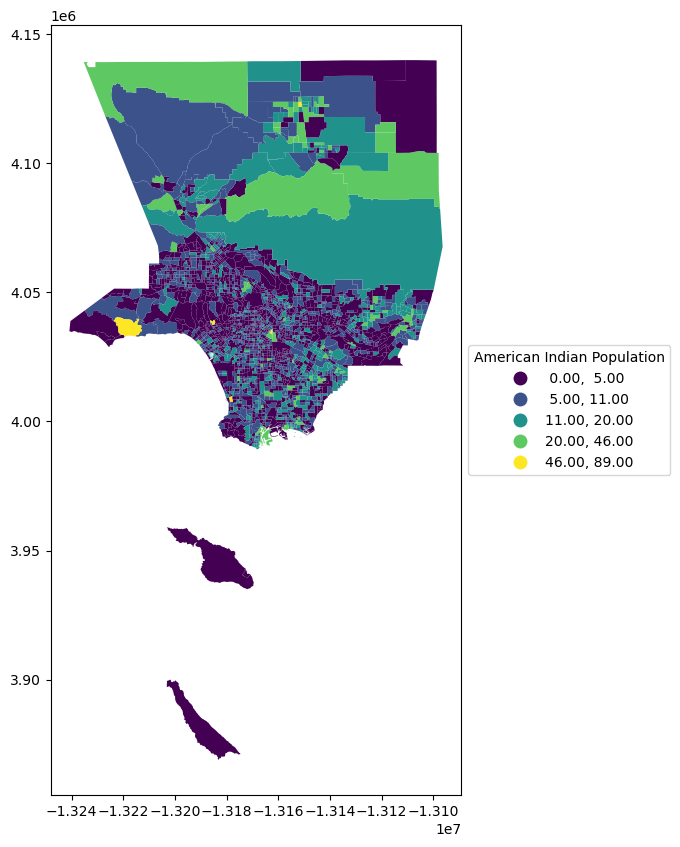

In [36]:
# American Indian Population in the County of Los Angeles 
tractsCleaned.plot(figsize=(12,10),
            column='AMERICAN INDIAN',
            legend=True,
            scheme='NaturalBreaks',
  legend_kwds={'loc': 'center left', 'title': 'American Indian Population', 'bbox_to_anchor': (1,0.50)})

plt.savefig('AIndian.png')

In [38]:
# Finding the total of each race 
print(tractsCleaned['WHITE'].sum())
print(tractsCleaned['BLACK'].sum())
print(tractsCleaned['ASIAN'].sum())
print(tractsCleaned['HISPANIC'].sum())
print(tractsCleaned['AMERICAN INDIAN'].sum())


2430918
728130
1517016
4843941
17994


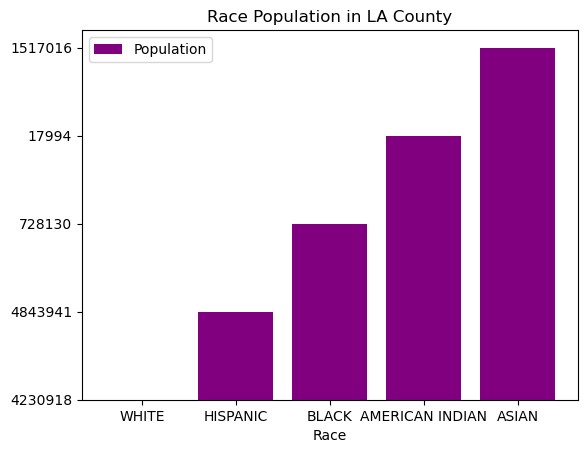

<Figure size 640x480 with 0 Axes>

In [49]:
x = ["WHITE", "HISPANIC","BLACK","AMERICAN INDIAN","ASIAN"]
y = ['4230918', '4843941', '728130', '17994', '1517016']

plt.bar(x,y,label="Population",color="purple")

plt.xlabel("Race")
plt.title("Race Population in LA County")
plt.legend()
plt.show()
plt.savefig('race.png')


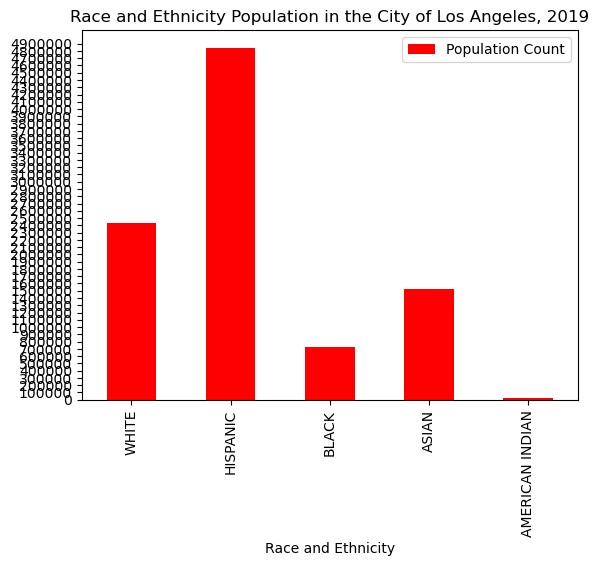

In [99]:
tractsCleaned = tractsCleaned1 = pd.DataFrame({'Race and Ethnicity':['WHITE', 'HISPANIC', 'BLACK', 'ASIAN', 'AMERICAN INDIAN'], 
                   'Population Count':[2430918, 4843941, 728130, 1517016, 17994], 
                   'Color':['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']})
                                  
ax = tractsCleaned.plot.bar(x='Race and Ethnicity', 
               y='Population Count', 
               title='Race and Ethnicity Population in the City of Los Angeles, 2019',
               color='red')

yticks = range(0, max(tractsCleaned['Population Count']) + 100000, 100000)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(tick / 1)}' for tick in yticks])

plt.savefig('bar_chart1.png')

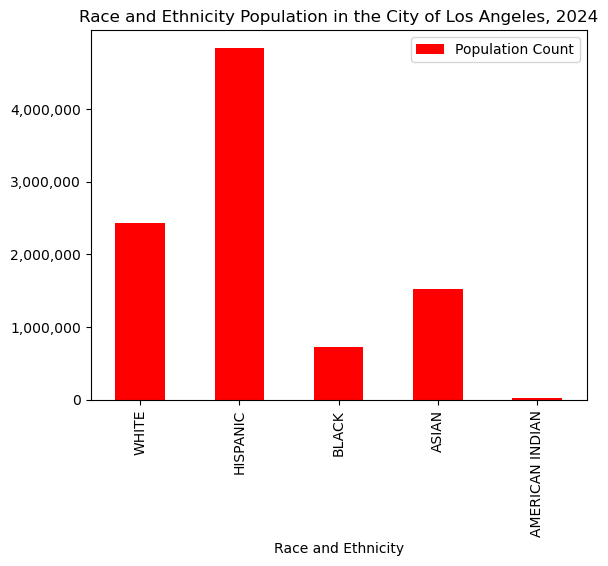

In [32]:
tractsCleaned = tractsCleaned1 = pd.DataFrame({'Race and Ethnicity':['WHITE', 'HISPANIC', 'BLACK', 'ASIAN', 'AMERICAN INDIAN'], 
                   'Population Count':[2430918, 4843941, 728130, 1517016, 17994], 
                   'Color':['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']})
                                  
ax = tractsCleaned.plot.bar(x='Race and Ethnicity', 
               y='Population Count', 
               title='Race and Ethnicity Population in the City of Los Angeles, 2024',
               color='red')


yticks = range(0, max(tractsCleaned['Population Count']) + 100000, 1000000) 
ax.set_yticks(yticks)


import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}')) 

plt.savefig('bar_chart1.png')

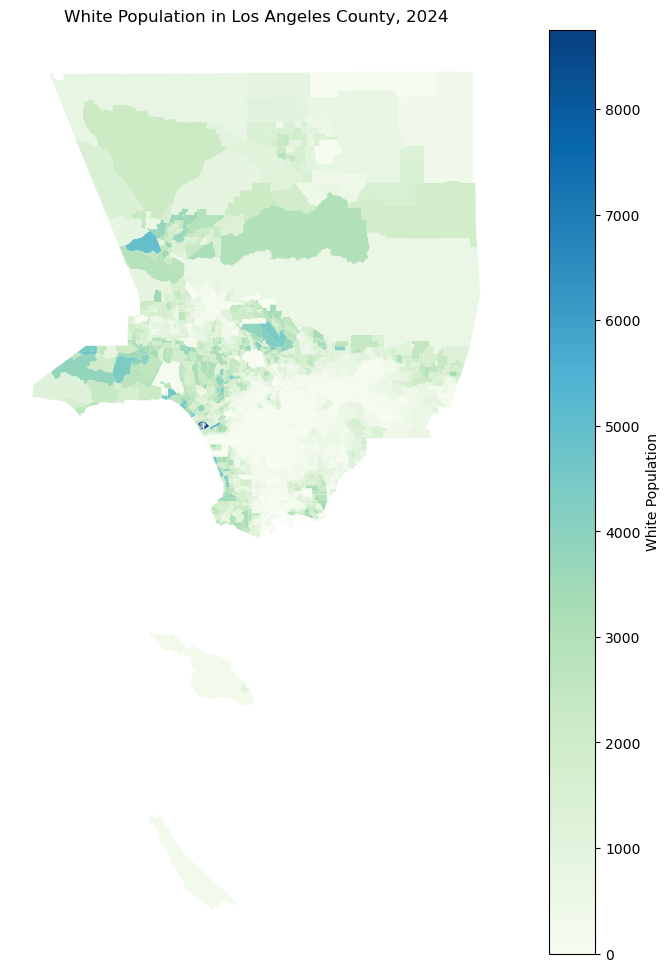

In [63]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='WHITE',legend=True,cmap='GnBu',
             legend_kwds={"label": "White Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('White Population in Los Angeles County, 2024')

plt.savefig("WHITEPOP.png")

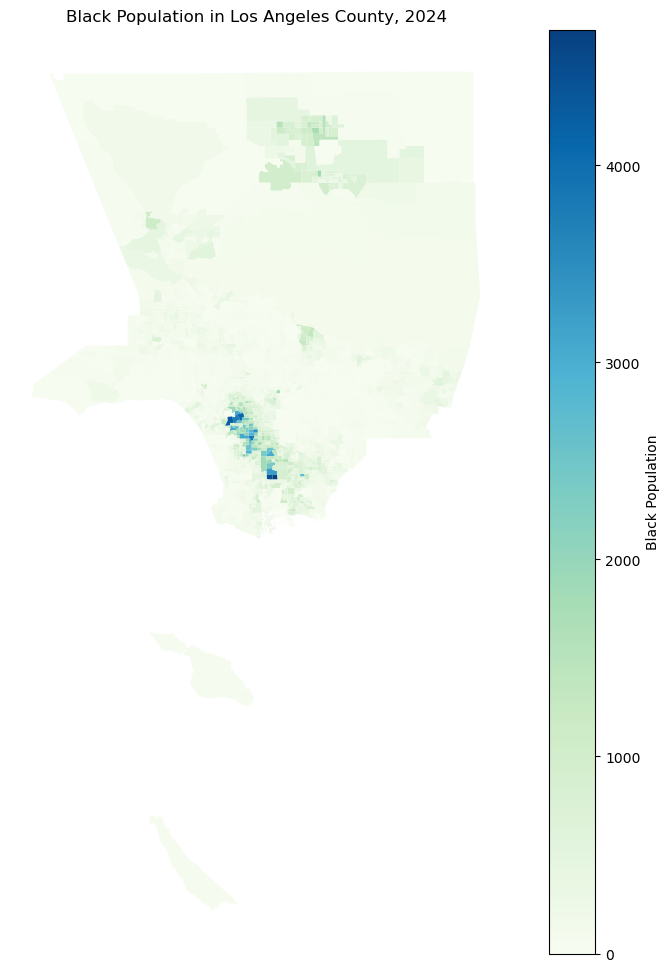

In [64]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='BLACK',legend=True,cmap='GnBu',
             legend_kwds={"label": "Black Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Black Population in Los Angeles County, 2024')

plt.savefig("Black.png")

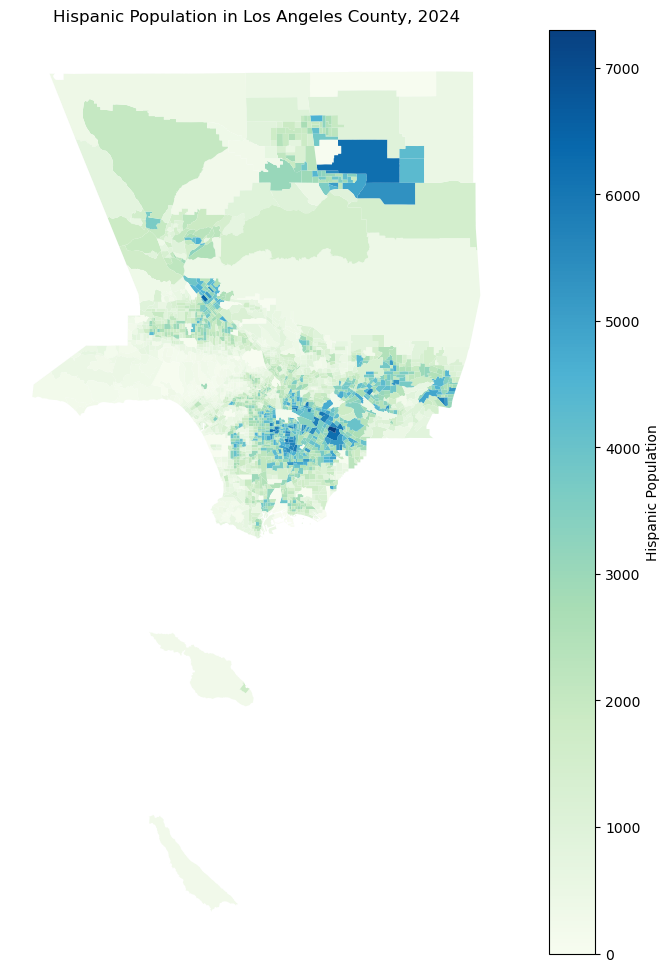

In [79]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='HISPANIC',legend=True,cmap='GnBu',
             legend_kwds={"label": "Hispanic Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Hispanic Population in Los Angeles County, 2024')

plt.savefig("HISPANICPOP2.png")

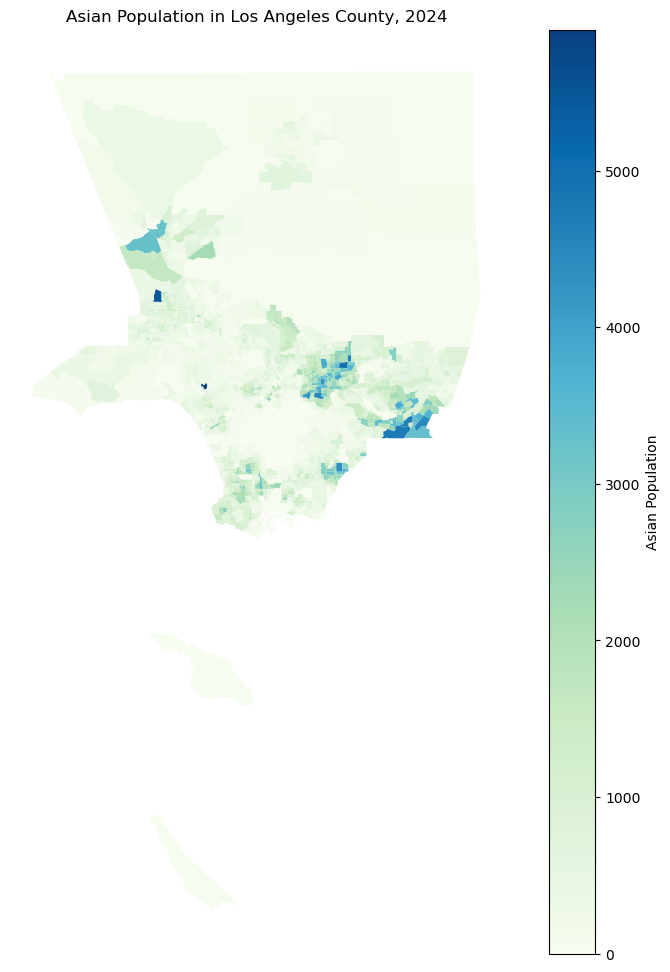

In [67]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='ASIAN',legend=True,cmap='GnBu',
             legend_kwds={"label": "Asian Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Asian Population in Los Angeles County, 2024')

plt.savefig("ASIANPOP.png")

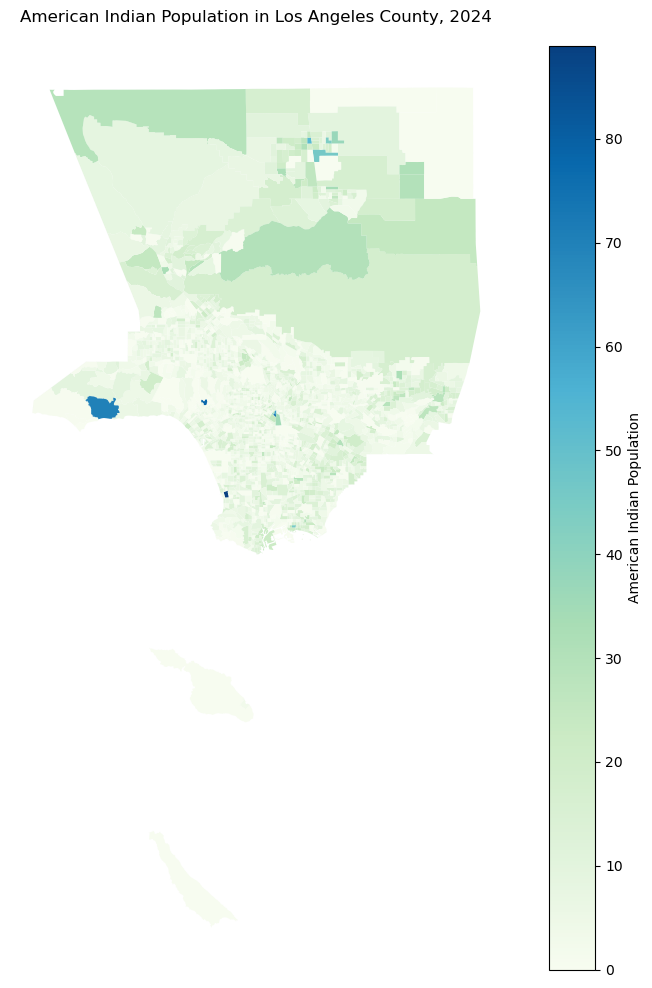

In [68]:
# making maps using matplotlib , #White Residents in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='AMERICAN INDIAN',legend=True,cmap='GnBu',
             legend_kwds={"label": "American Indian Population", "orientation": "vertical"})

ax.axis('off')
ax.set_title('American Indian Population in Los Angeles County, 2024')

plt.savefig("AmericanIndian.png")

In [69]:

# Finding the total of EDUCATIONAL ATTAINMENT 
print(tractsCleaned['NOHS'].sum())
print(tractsCleaned['SOMEHS'].sum())
print(tractsCleaned['HSGRAD'].sum())
print(tractsCleaned['GED'].sum())
print(tractsCleaned['SOMECOLL'].sum())
print(tractsCleaned['ASSDEG'].sum())
print(tractsCleaned['BACH'].sum())
print(tractsCleaned['GRAD'].sum())


735486
493761
1346527
146962
1139514
526551
1739665
944564


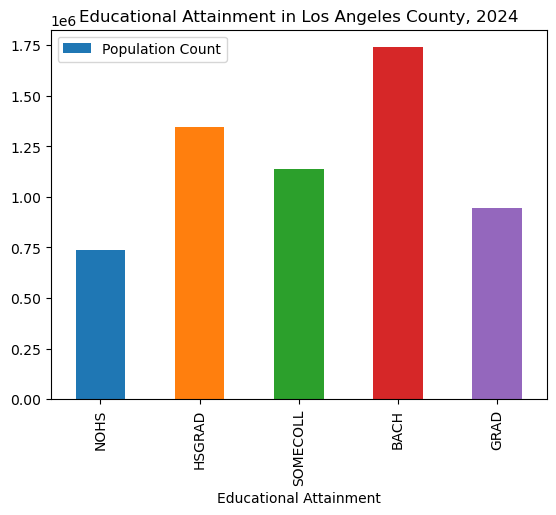

In [102]:

tractsCleaned = pd.DataFrame({
    'Educational Attainment': ['NOHS', 'HSGRAD', 'SOMECOLL', 'BACH','GRAD'], 
    'Population Count': [735486, 1346527, 1139514, 1739665, 944564],
    'Color': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
})
                                  

ax = tractsCleaned.plot.bar(
    x='Educational Attainment', 
    y='Population Count', 
    title='Educational Attainment in Los Angeles County, 2024',
    color=tractsCleaned['Color']  
)  


plt.savefig("edu.png")

In [81]:
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']

In [82]:
tractsCleaned = censustracts[columns_to_keep]

In [85]:
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

In [87]:
# Finding the total of Income levels 
print(tractsCleaned['LESS15'].sum())
print(tractsCleaned['25-34'].sum())
print(tractsCleaned['35-49'].sum())
print(tractsCleaned['50-74'].sum())
print(tractsCleaned['75-99'].sum())
print(tractsCleaned['100-149'].sum())
print(tractsCleaned['150-199'].sum())
print(tractsCleaned['200MORE'].sum())


310508
207047
292978
480166
425655
609217
371725
593733


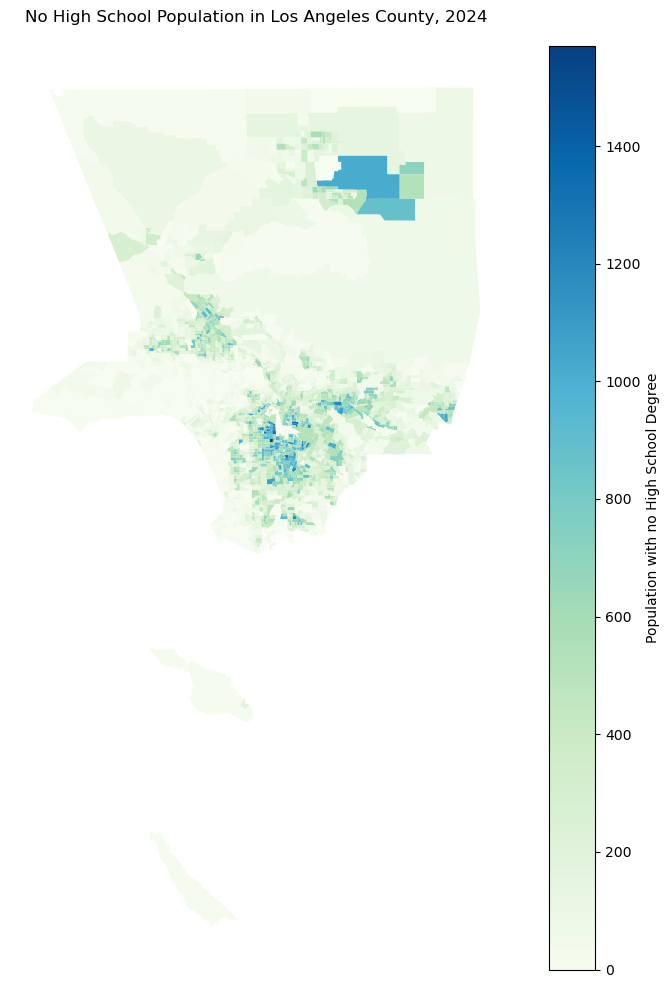

In [89]:
# making maps using matplotlib , #No High School in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='NOHS',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with no High School Degree", "orientation": "vertical"})

ax.axis('off')
ax.set_title('No High School Population in Los Angeles County, 2024')

plt.savefig("No High School.png")

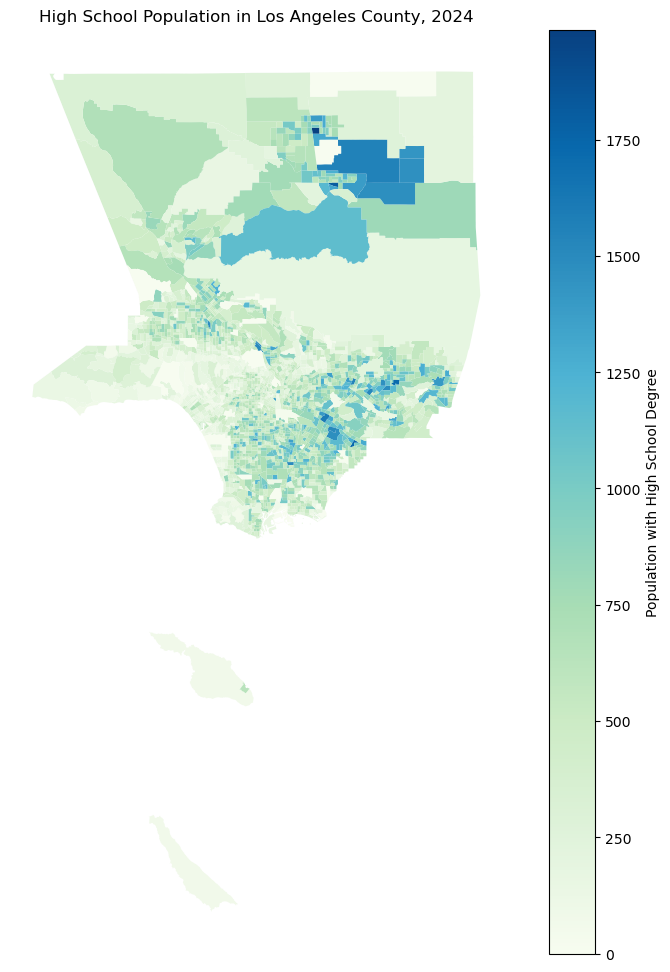

In [92]:
# making maps using matplotlib , #High School in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='HSGRAD',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with High School Degree", "orientation": "vertical"})

ax.axis('off')
ax.set_title('High School Population in Los Angeles County, 2024')

plt.savefig("High School.png")

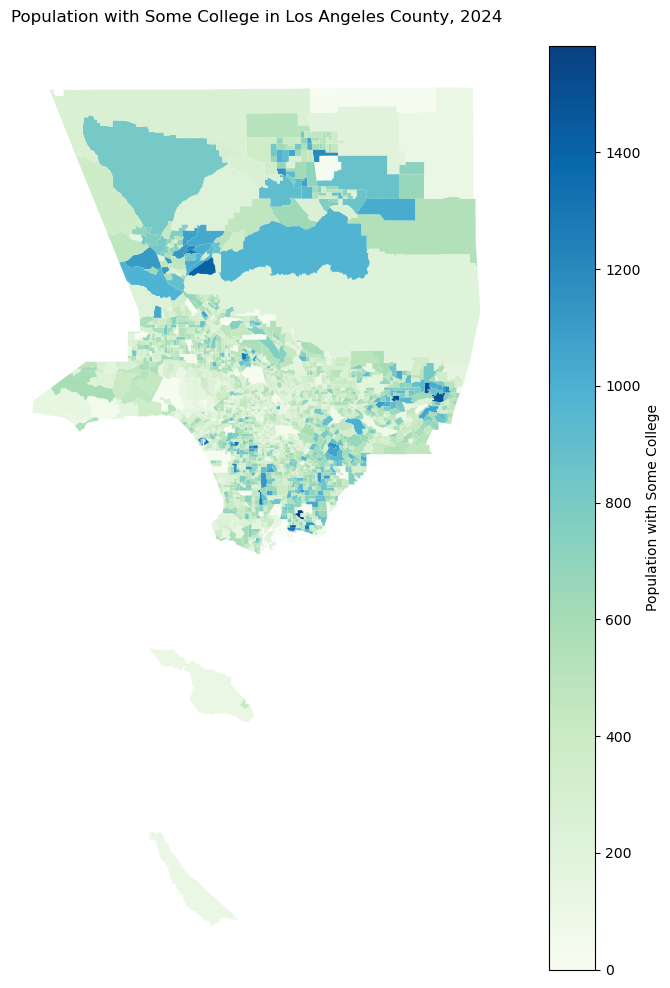

In [93]:
# making maps using matplotlib with Some College in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='SOMECOLL',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with Some College", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Population with Some College in Los Angeles County, 2024')

plt.savefig("somecollege.png")

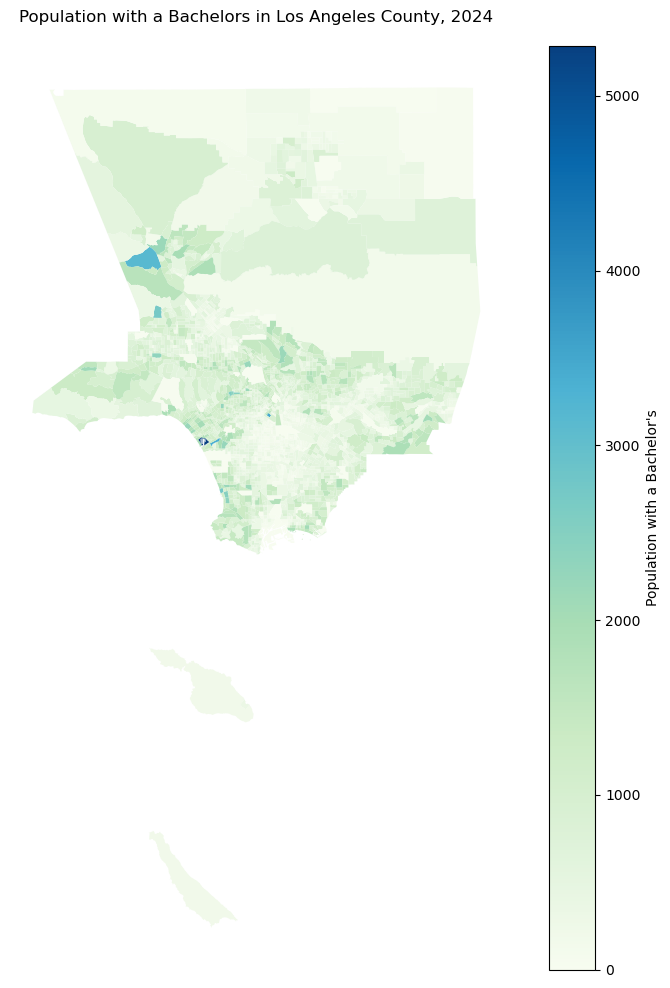

In [94]:
# making maps using matplotlib with a Bachelor's Degree in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='BACH',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with a Bachelor's", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Population with a Bachelors in Los Angeles County, 2024')

plt.savefig("bach.png")

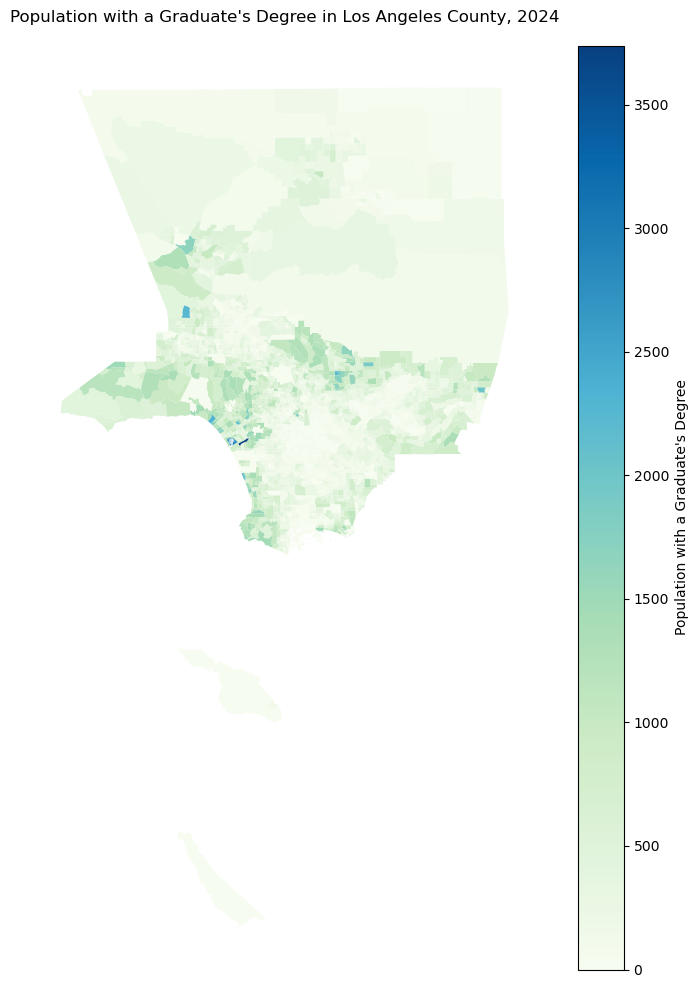

In [97]:
# making maps using matplotlib with Graduate Degree in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='GRAD',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with a Graduate's Degree", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with a Graduate's Degree in Los Angeles County, 2024") 

plt.savefig("grad.png")

In [3]:
# I will be using pandas for data exploration 
import pandas as pd
import geopandas as gpd

In [4]:
# First, install the missing package
!pip install contextily

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

# importing for interactive plots 
import plotly.express as px

In [5]:
# I will be importing LACOUNTYTRACTS24
censustracts=gpd.read_file('LACountyTracts24.zip')

In [6]:
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']


In [7]:
tractsCleaned = censustracts[columns_to_keep]

In [8]:
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

In [9]:
# Finding the total of Income levels 
print(tractsCleaned['LESS15'].sum())
print(tractsCleaned['25-34'].sum())
print(tractsCleaned['35-49'].sum())
print(tractsCleaned['50-74'].sum())
print(tractsCleaned['75-99'].sum())
print(tractsCleaned['100-149'].sum())
print(tractsCleaned['150-199'].sum())
print(tractsCleaned['200MORE'].sum())


310508
207047
292978
480166
425655
609217
371725
593733


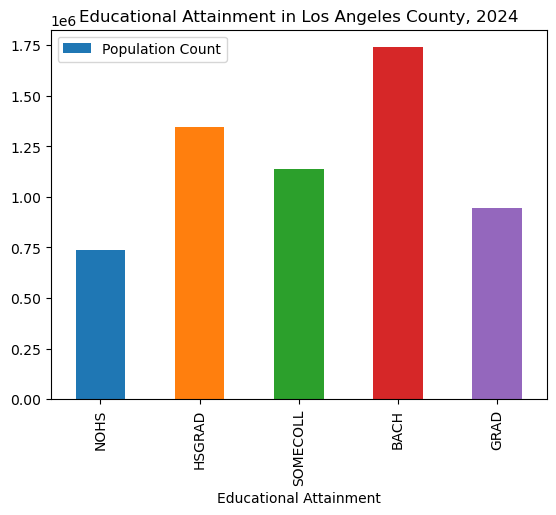

In [10]:

tractsCleaned = pd.DataFrame({
    'Educational Attainment': ['NOHS', 'HSGRAD', 'SOMECOLL', 'BACH','GRAD'], 
    'Population Count': [735486, 1346527, 1139514, 1739665, 944564],
    'Color': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
})
                                  

ax = tractsCleaned.plot.bar(
    x='Educational Attainment', 
    y='Population Count', 
    title='Educational Attainment in Los Angeles County, 2024',
    color=tractsCleaned['Color']  
)  


plt.savefig("edu.png")

In [14]:
# I will be using pandas for data exploration 
import pandas as pd
import geopandas as gpd

In [15]:
# First, install the missing package
!pip install contextily

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

# importing for interactive plots 
import plotly.express as px

In [16]:
# I will be importing LACOUNTYTRACTS24
censustracts=gpd.read_file('LACountyTracts24.zip')

In [17]:
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']


In [18]:
tractsCleaned = censustracts[columns_to_keep]

In [19]:
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

In [20]:
# Finding the total of Income levels 
print(tractsCleaned['LESS15'].sum())
print(tractsCleaned['25-34'].sum())
print(tractsCleaned['35-49'].sum())
print(tractsCleaned['50-74'].sum())
print(tractsCleaned['75-99'].sum())
print(tractsCleaned['100-149'].sum())
print(tractsCleaned['150-199'].sum())
print(tractsCleaned['200MORE'].sum())

310508
207047
292978
480166
425655
609217
371725
593733


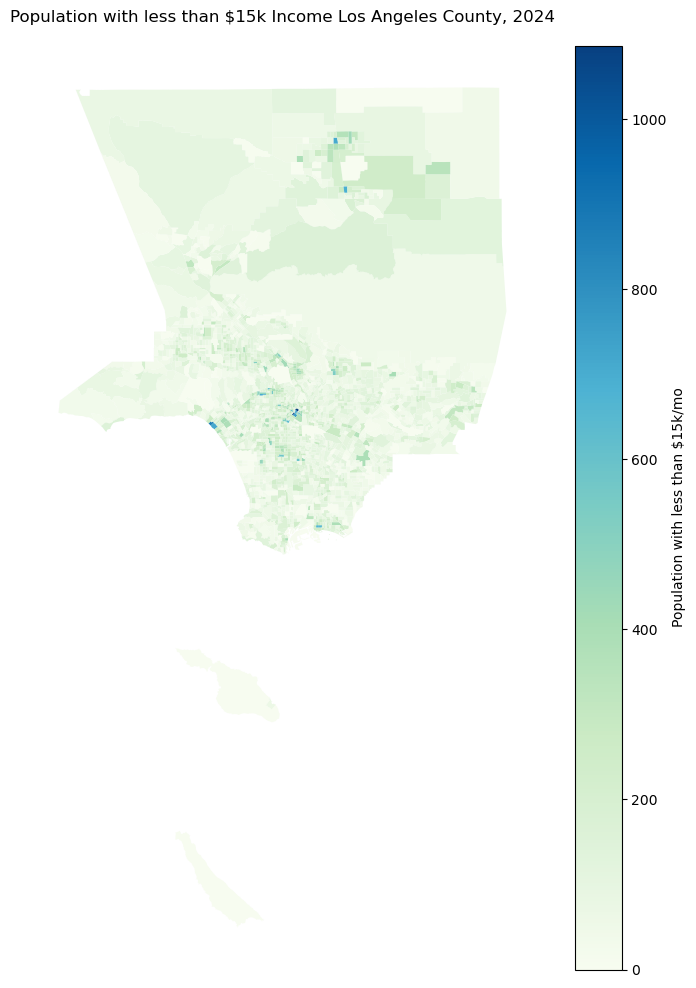

In [21]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='LESS15',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with less than $15k/mo", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with less than $15k Income Los Angeles County, 2024") 

plt.savefig("less15.png")

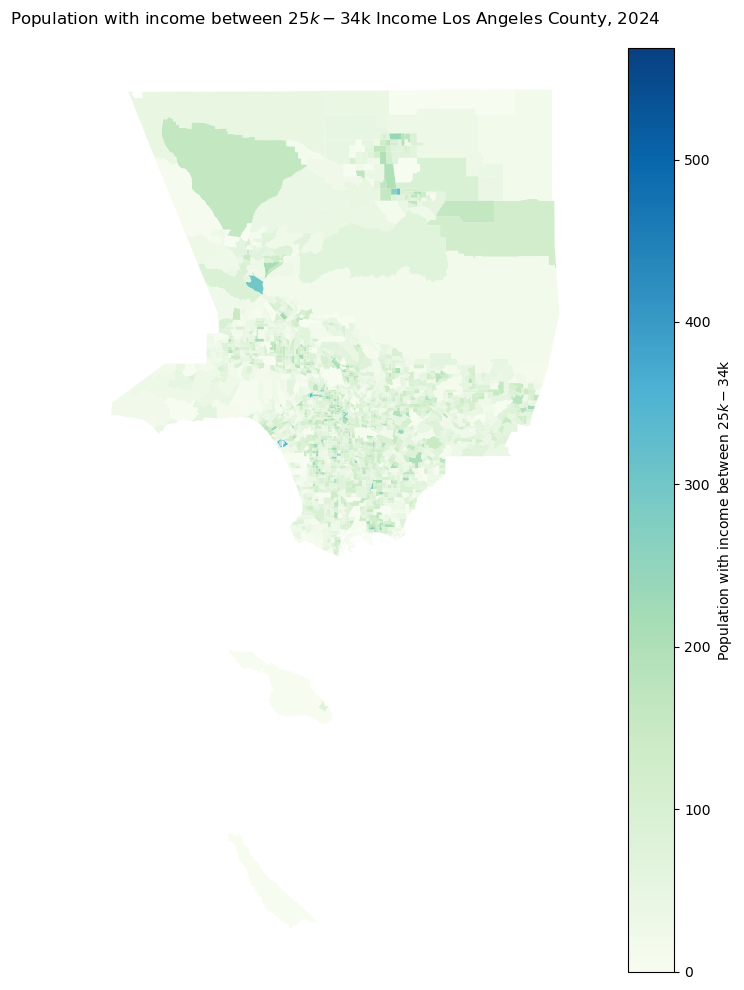

In [22]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='25-34',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with income between $25k-$34k", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with income between $25k-$34k Income Los Angeles County, 2024") 

plt.savefig("25-34.png")

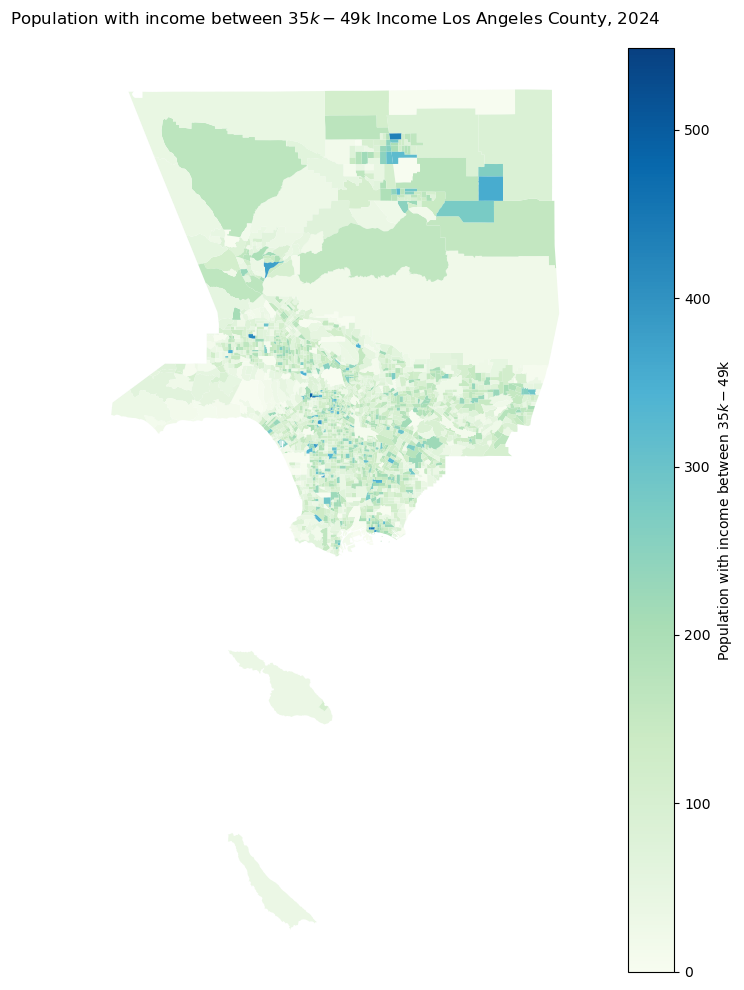

In [23]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='35-49',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with income between $35k-$49k", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with income between $35k-$49k Income Los Angeles County, 2024") 

plt.savefig("35-49.png")

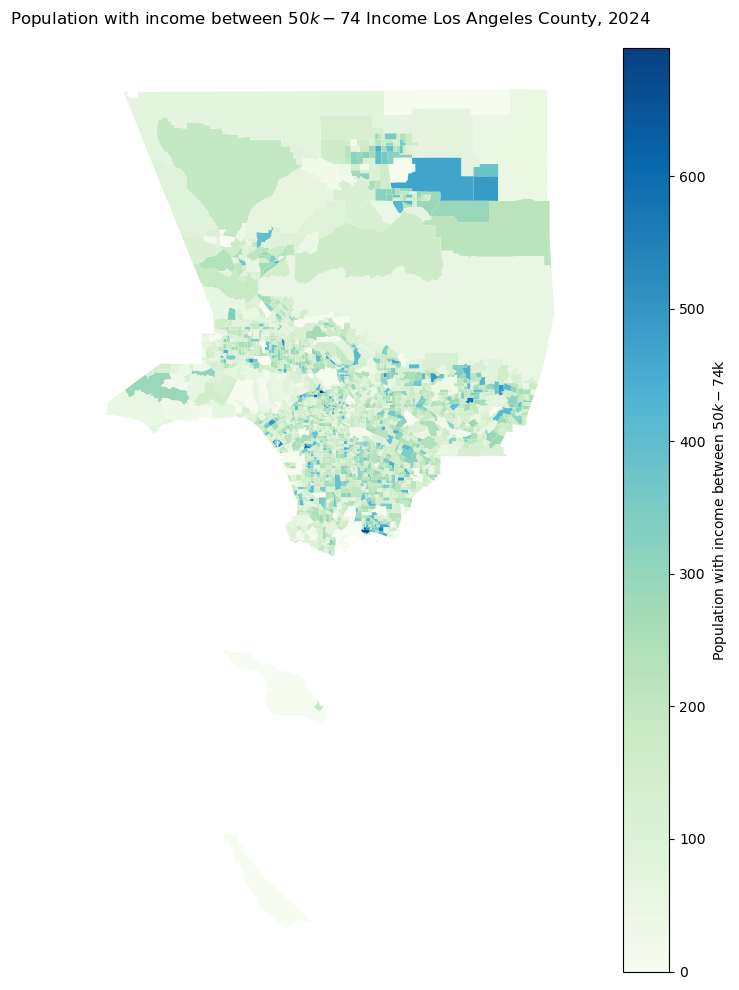

In [24]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='50-74',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with income between $50k-$74k", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with income between $50k-$74 Income Los Angeles County, 2024") 

plt.savefig("50-74.png")

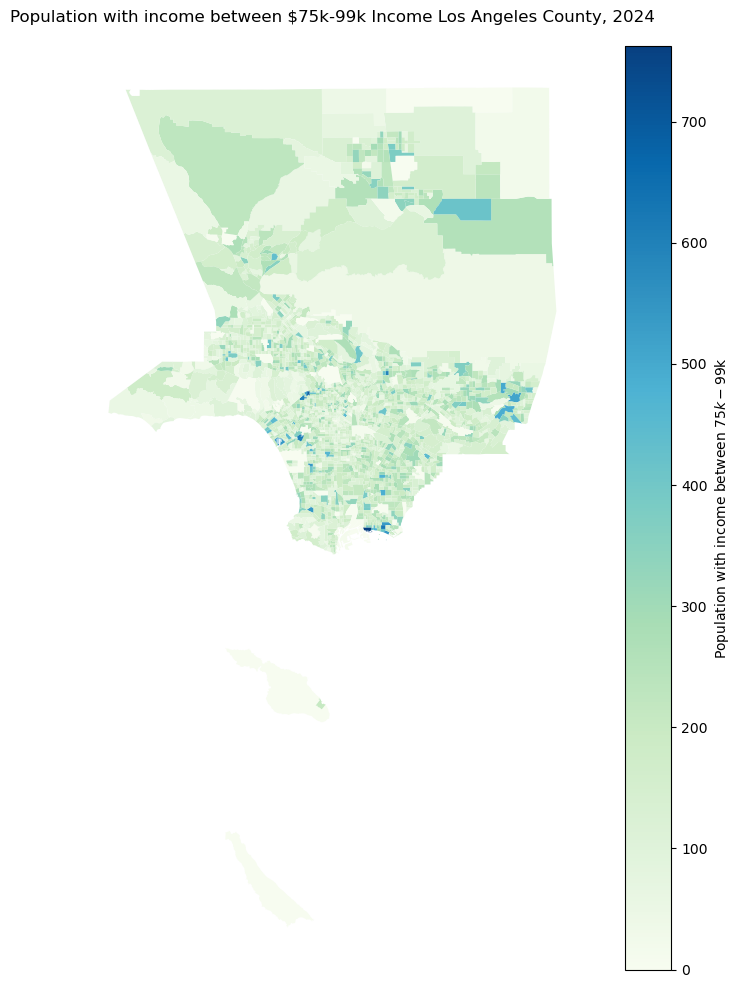

In [26]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='75-99',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with income between $75k-$99k", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with income between $75k-99k Income Los Angeles County, 2024") 

plt.savefig("75-99.png")

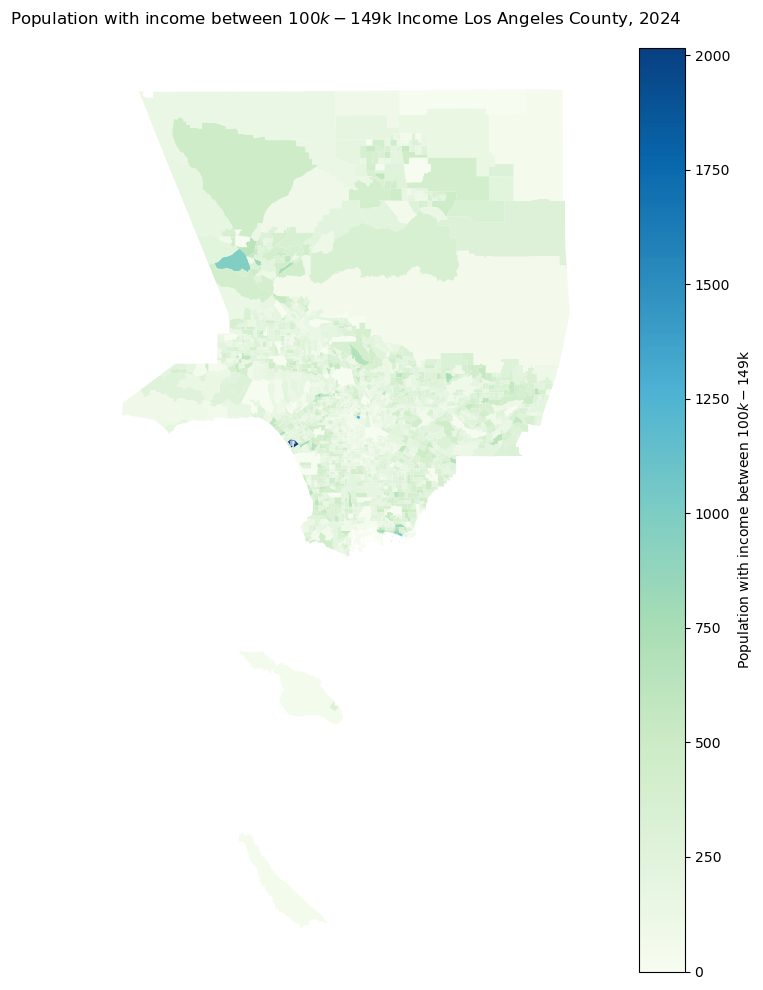

In [27]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='100-149',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with income between $100k-$149k", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with income between $100k-$149k Income Los Angeles County, 2024") 

plt.savefig("100-149.png")

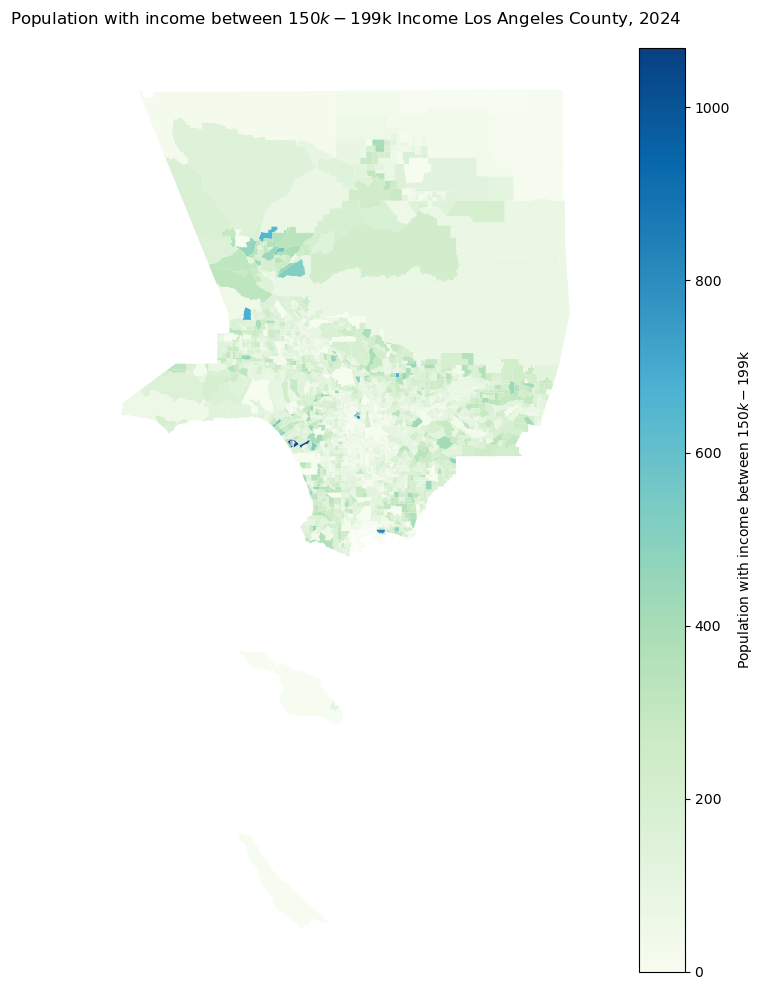

In [28]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='150-199',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with income between $150k-$199k", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with income between $150k-$199k Income Los Angeles County, 2024") 

plt.savefig("150-199.png")

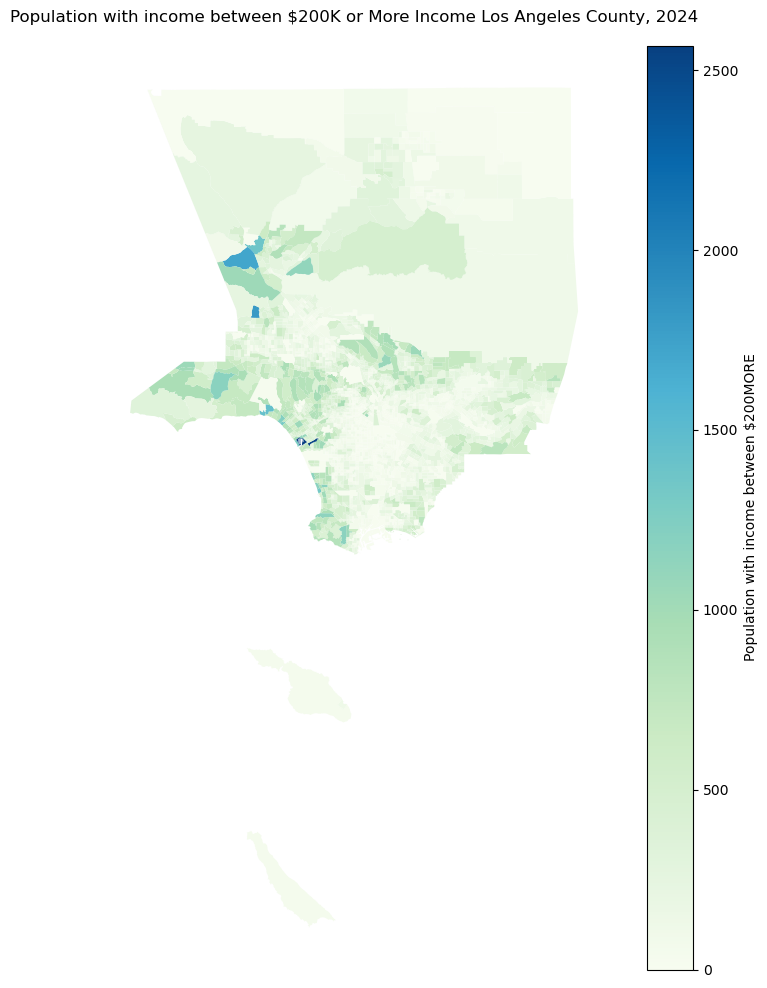

In [29]:
# making maps using matplotlib with Less than $15k/mo in LA County

fig,ax = plt.subplots(figsize=(12,12))

tractsCleaned.plot(ax=ax,column='200MORE',legend=True,cmap='GnBu',
             legend_kwds={"label": "Population with income between $200MORE", "orientation": "vertical"})

ax.axis('off')
ax.set_title("Population with income between $200K or More Income Los Angeles County, 2024") 

plt.savefig("200more.png")

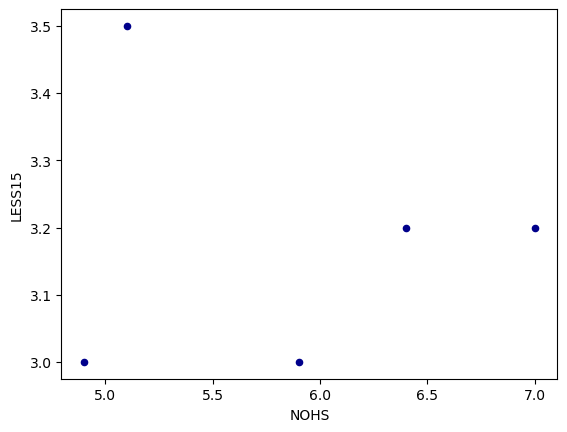

In [38]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['NOHS', 'LESS15', 'species'])

ax1 = df.plot.scatter(x='NOHS',
                      y='LESS15',
                      c='DarkBlue')

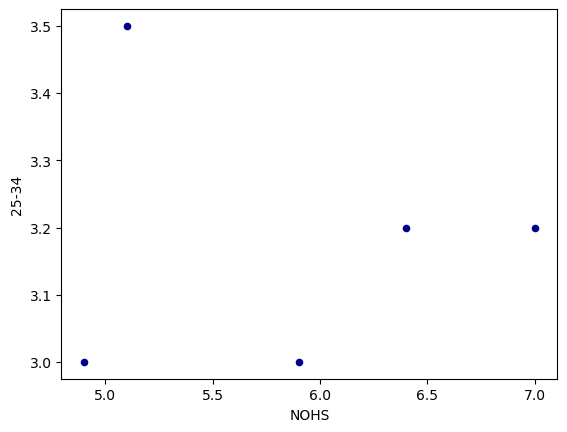

In [40]:

ax1 = df.plot.scatter(x='NOHS',
                      y='25-34',
                      c='DarkBlue')

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [48]:
# First, install the missing package
!pip install contextily

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

# importing for interactive plots 
import plotly.express as px

In [49]:
# I will be importing LACOUNTYTRACTS24
censustracts=gpd.read_file('LACountyTracts24.zip')

In [50]:
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']


In [51]:
tractsCleaned = censustracts[columns_to_keep]

In [52]:
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

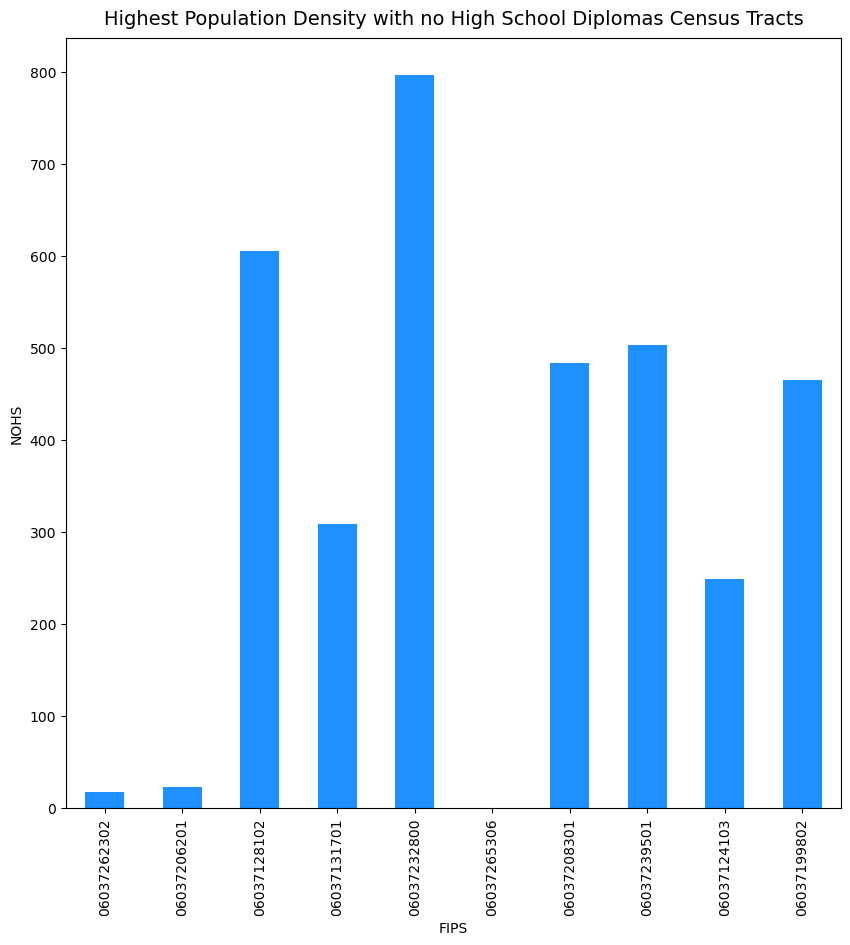

In [54]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax, 
                       x = 'FIPS',
                       y='NOHS',
                       legend=False,
                       color='dodgerblue',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('NOHS') # override y label
ax.set_title("Highest Population Density with no High School Diplomas Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("firstTenCensusTractsnohs.png", bbox_inches='tight')

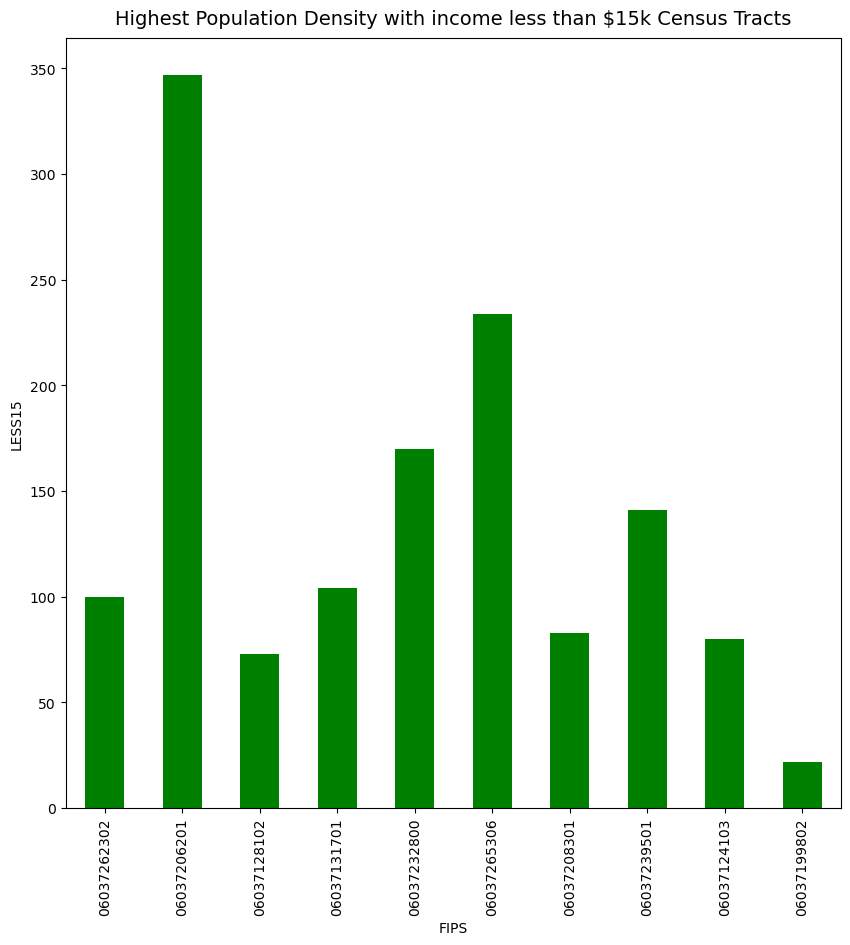

In [55]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax, 
                       x = 'FIPS',
                       y='LESS15',
                       legend=False,
                       color='green',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('LESS15') # override y label
ax.set_title("Highest Population Density with income less than $15k Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("firstTenCensusTractsless15.png", bbox_inches='tight')

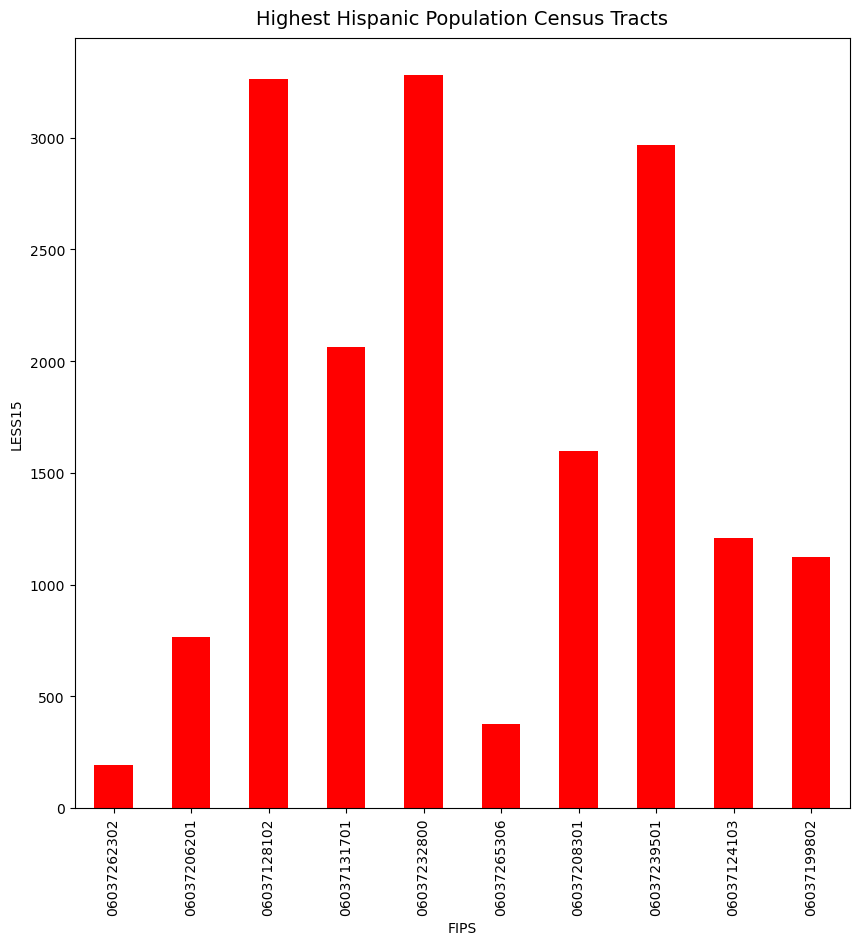

In [57]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax, 
                       x = 'FIPS',
                       y='HISPANIC',
                       legend=False,
                       color='red',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('LESS15') # override y label
ax.set_title("Highest Hispanic Population Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("firstTenCensushispanic.png", bbox_inches='tight')

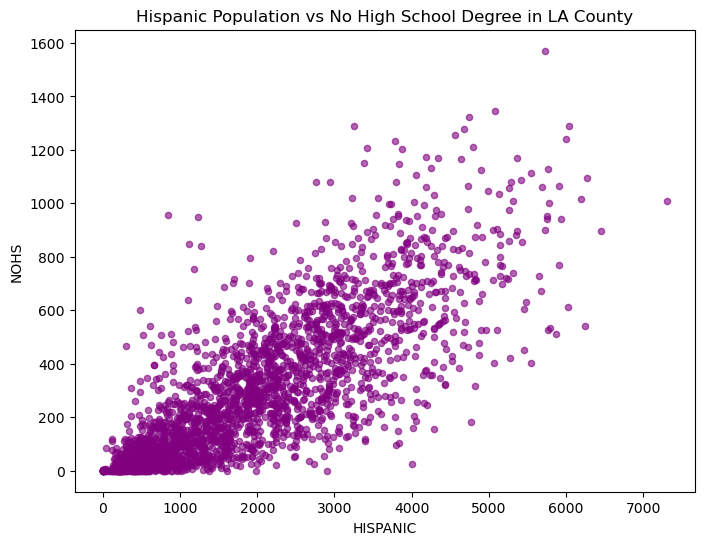

<Figure size 640x480 with 0 Axes>

In [58]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='HISPANIC',
    y='NOHS',
    alpha=0.6,
    color='purple',
    figsize=(8,6)
)
plt.xlabel('HISPANIC')
plt.ylabel('NOHS')
plt.title('Hispanic Population vs No High School Degree in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlot.png", bbox_inches='tight')

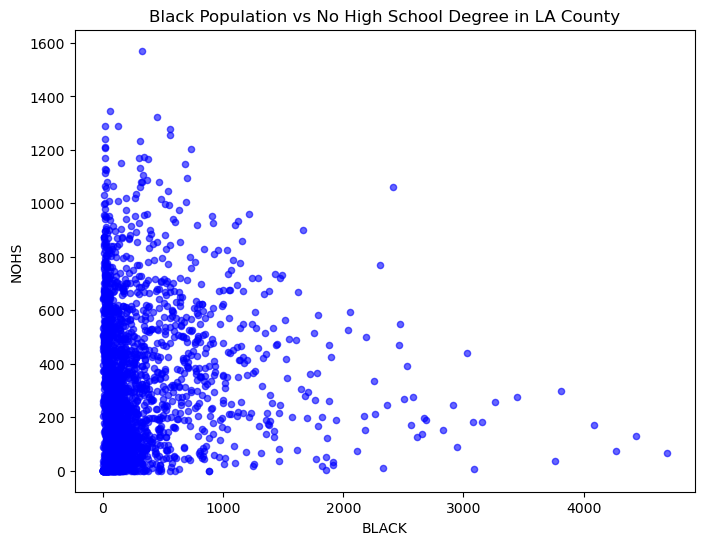

<Figure size 640x480 with 0 Axes>

In [59]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='BLACK',
    y='NOHS',
    alpha=0.6,
    color='BLUE',
    figsize=(8,6)
)
plt.xlabel('BLACK')
plt.ylabel('NOHS')
plt.title('Black Population vs No High School Degree in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlotbalck.png", bbox_inches='tight')

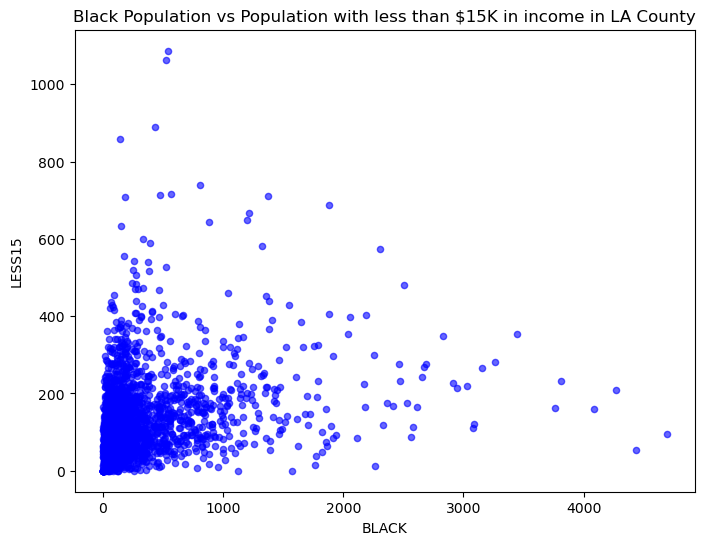

<Figure size 640x480 with 0 Axes>

In [60]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='BLACK',
    y='LESS15',
    alpha=0.6,
    color='BLUE',
    figsize=(8,6)
)
plt.xlabel('BLACK')
plt.ylabel('LESS15')
plt.title('Black Population vs Population with less than $15K in income in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlotbalcknceom.png", bbox_inches='tight')

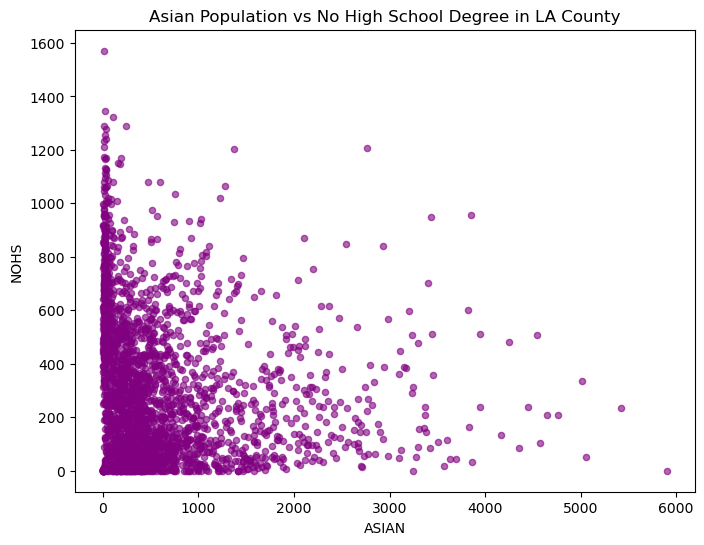

<Figure size 640x480 with 0 Axes>

In [61]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='ASIAN',
    y='NOHS',
    alpha=0.6,
    color='purple',
    figsize=(8,6)
)
plt.xlabel('ASIAN')
plt.ylabel('NOHS')
plt.title('Asian Population vs No High School Degree in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlotasian.png", bbox_inches='tight')

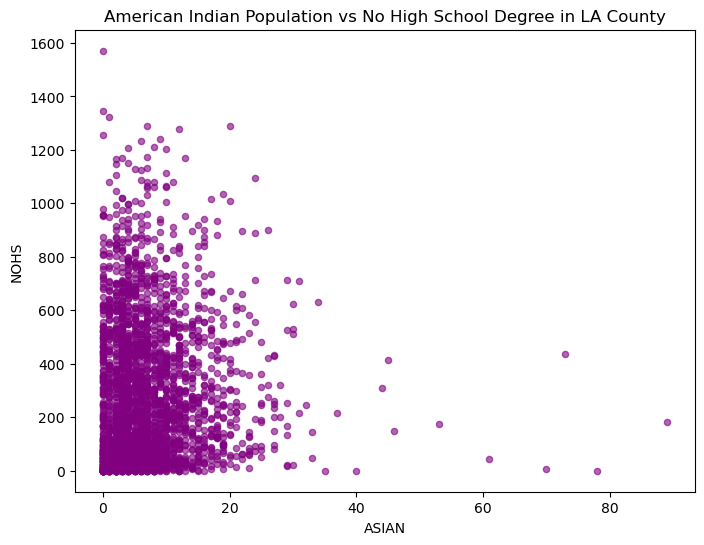

<Figure size 640x480 with 0 Axes>

In [62]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='AMERICAN INDIAN',
    y='NOHS',
    alpha=0.6,
    color='purple',
    figsize=(8,6)
)
plt.xlabel('ASIAN')
plt.ylabel('NOHS')
plt.title('American Indian Population vs No High School Degree in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlotain.png", bbox_inches='tight')

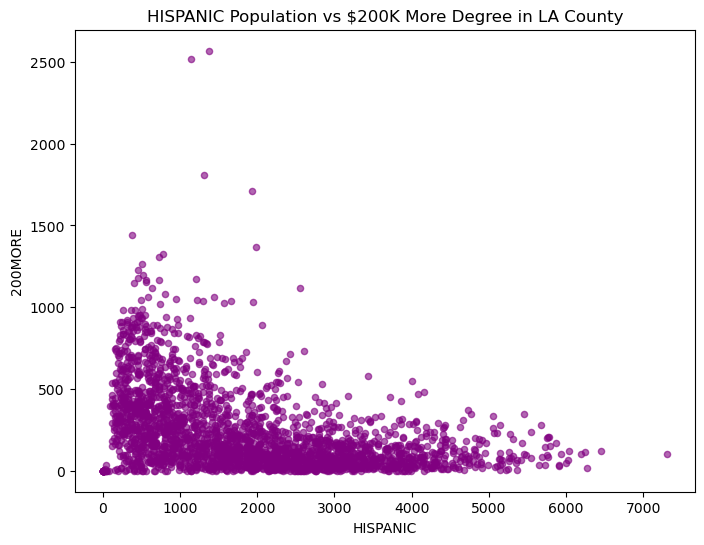

<Figure size 640x480 with 0 Axes>

In [65]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='HISPANIC',
    y='200MORE',
    alpha=0.6,
    color='purple',
    figsize=(8,6)
)
plt.xlabel('HISPANIC')
plt.ylabel('200MORE')
plt.title('HISPANIC Population vs $200K More Degree in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlot200his.png", bbox_inches='tight')

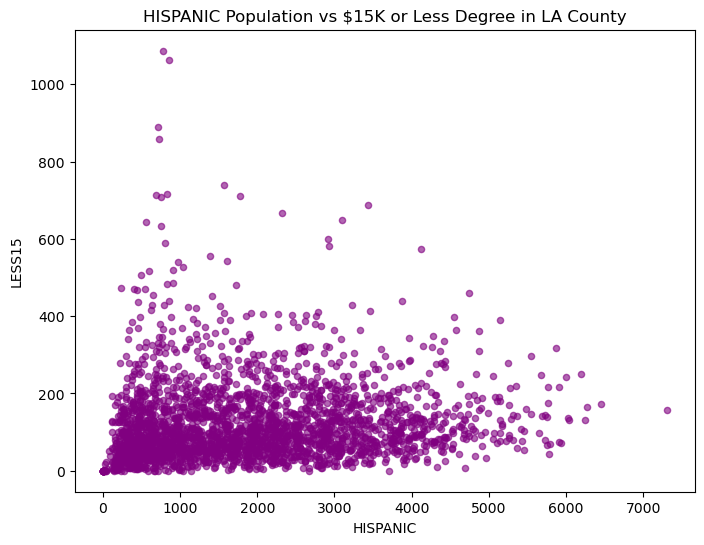

<Figure size 640x480 with 0 Axes>

In [67]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='HISPANIC',
    y='LESS15',
    alpha=0.6,
    color='purple',
    figsize=(8,6)
)
plt.xlabel('HISPANIC')
plt.ylabel('LESS15')
plt.title('HISPANIC Population vs $15K or Less Degree in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlotess15his.png", bbox_inches='tight')

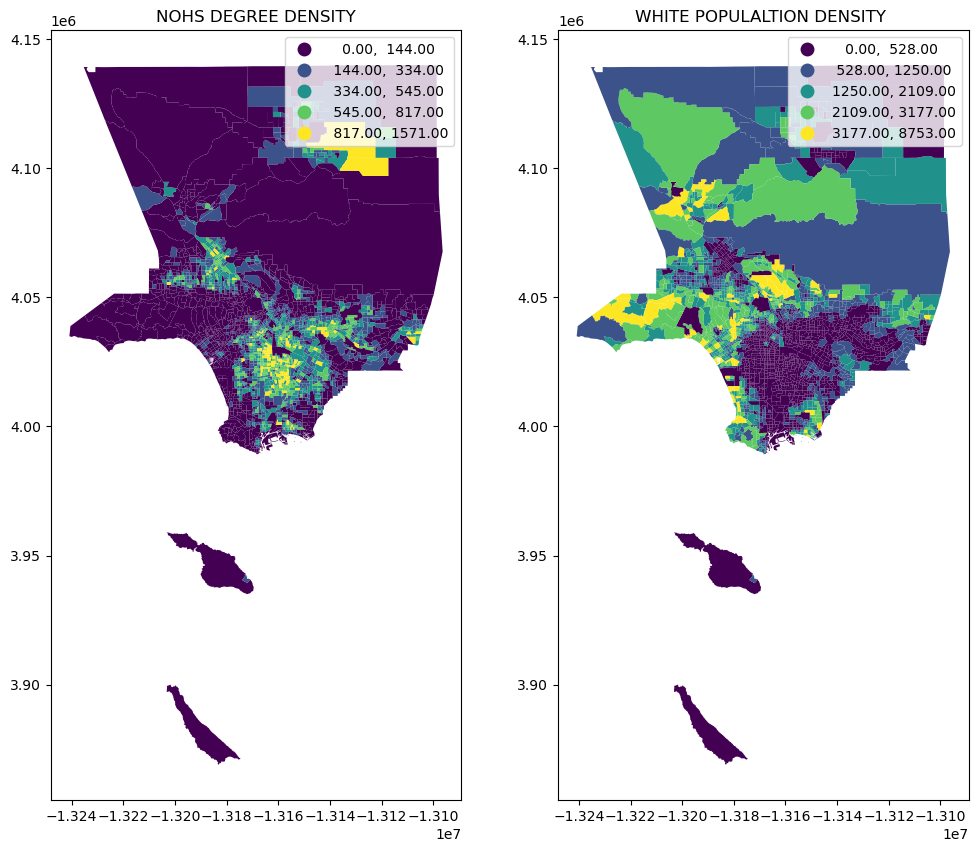

In [75]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='NOHS', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('NOHS DEGREE DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='WHITE', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('WHITE POPULALTION DENSITY ')


plt.savefig("NOHSWHITE.png", bbox_inches='tight')

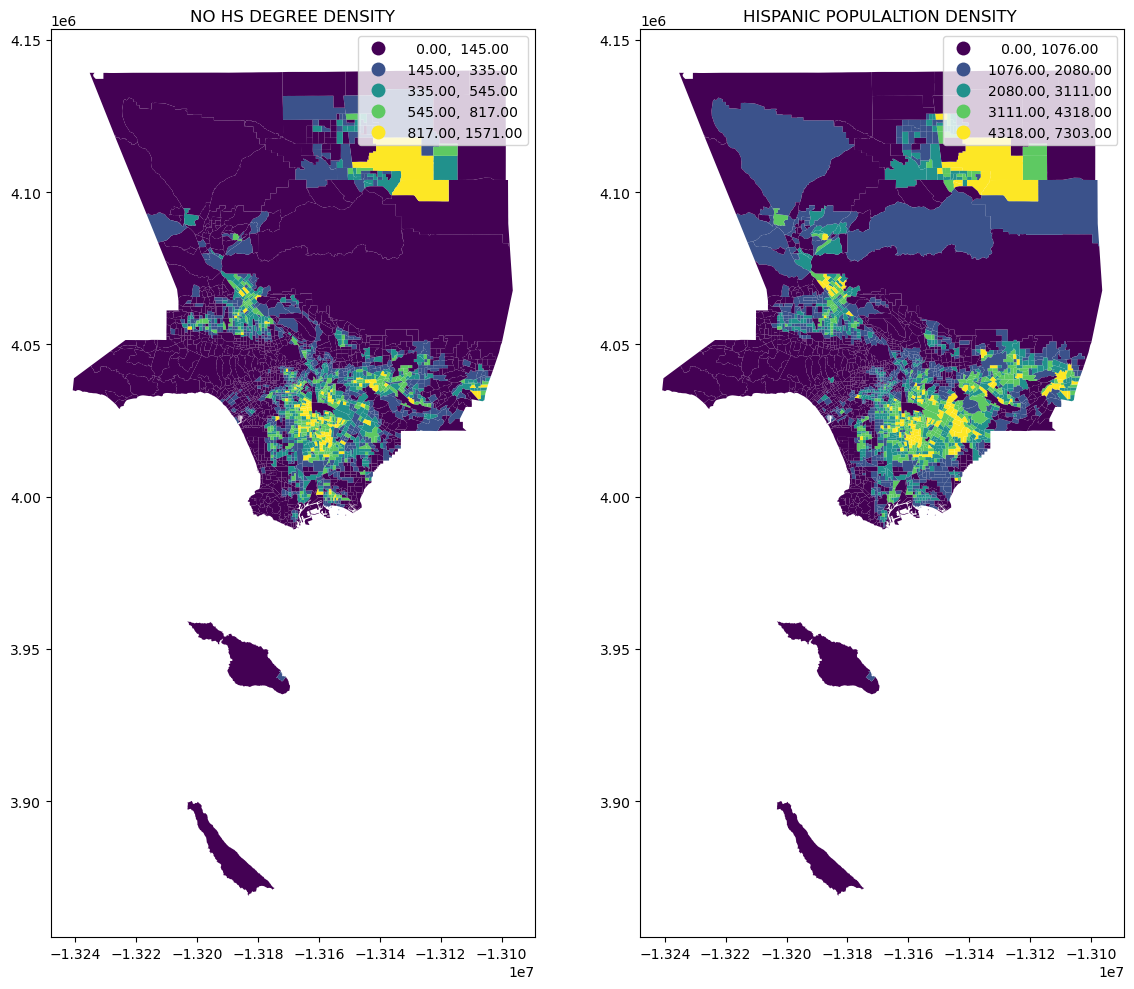

In [76]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='NOHS', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('NO HS DEGREE DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='HISPANIC', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('HISPANIC POPULALTION DENSITY ')

# Adjust layout
plt.tight_layout()
plt.savefig("NOHIS.png", bbox_inches='tight')

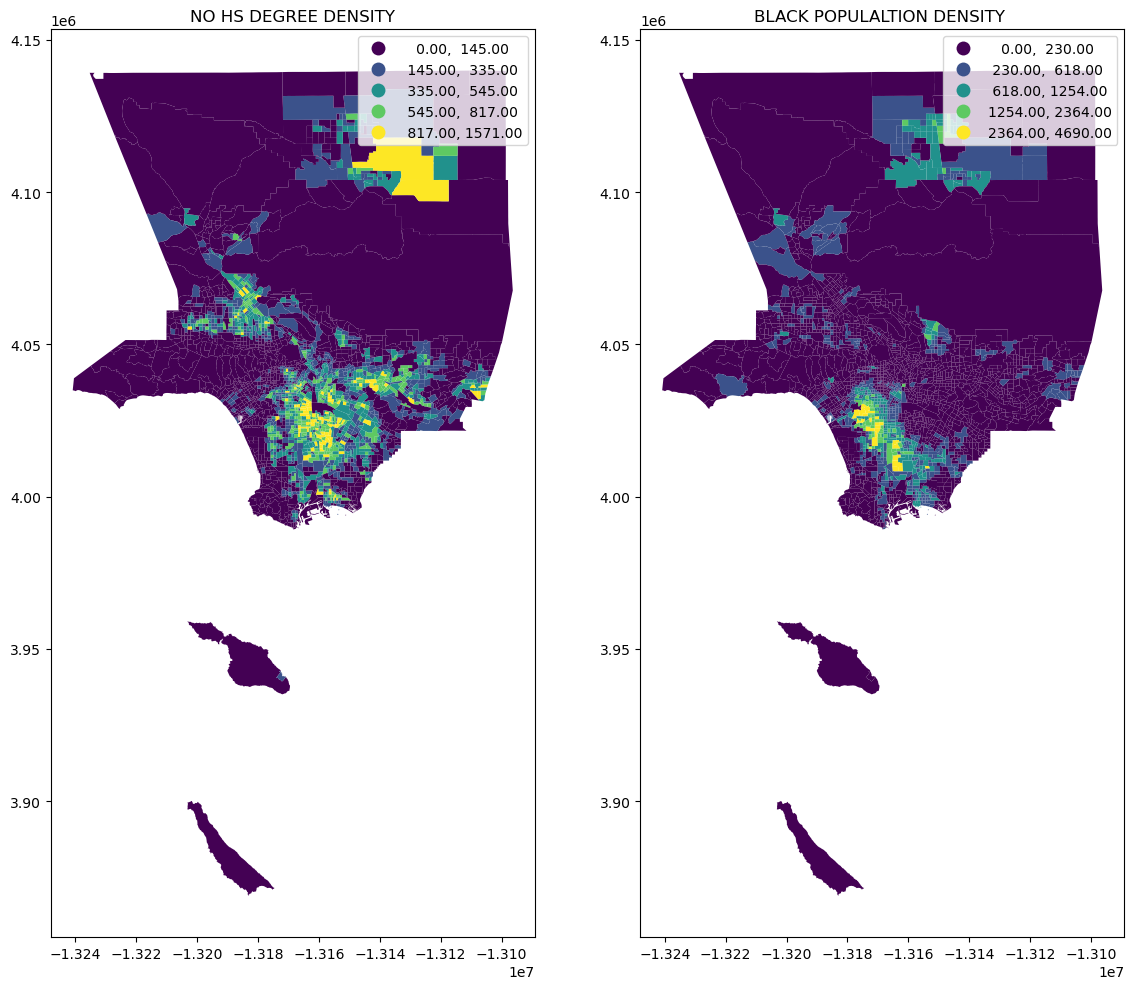

In [77]:

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='NOHS', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('NO HS DEGREE DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='BLACK', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('BLACK POPULALTION DENSITY ')

# Adjust layout
plt.tight_layout()
plt.savefig("NOHSVLACK.png", bbox_inches='tight')

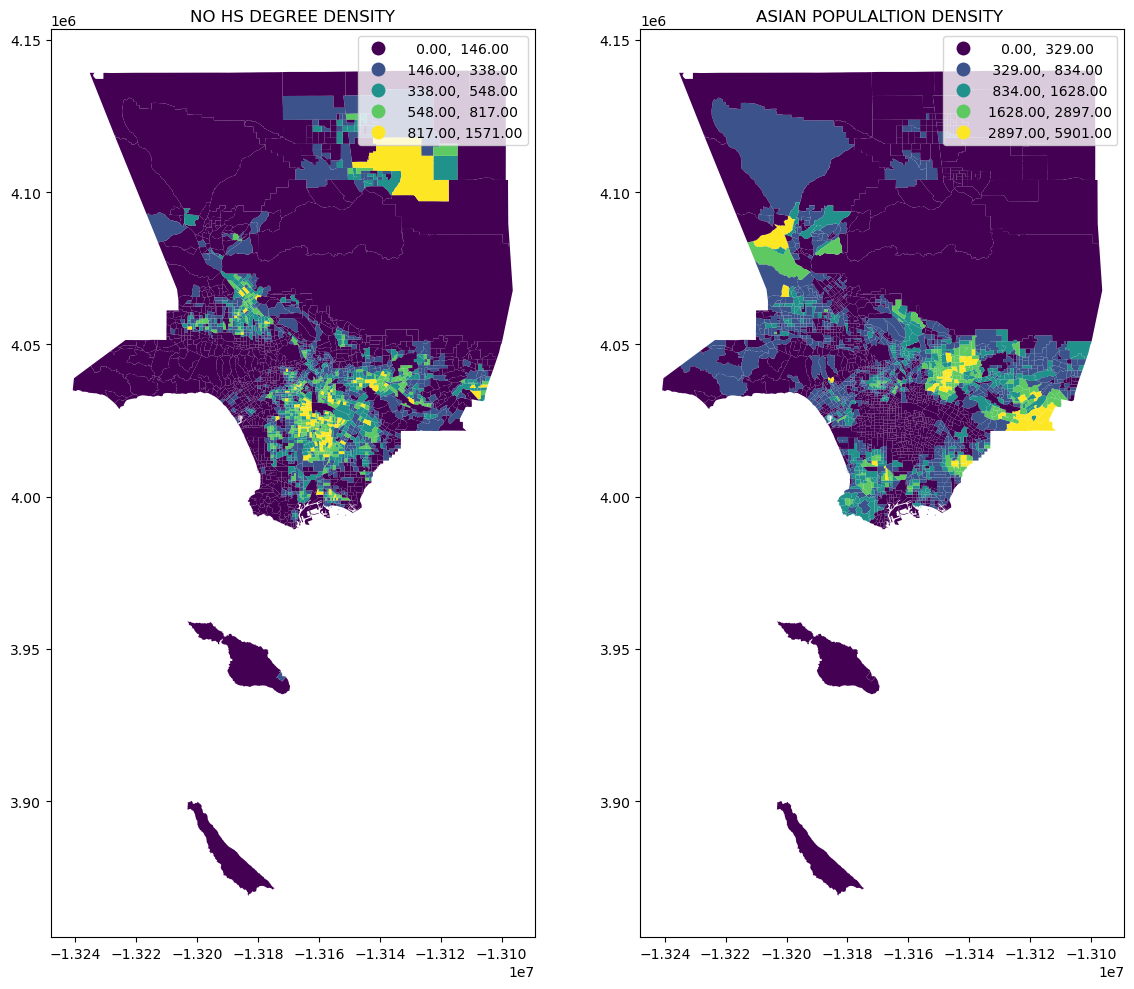

In [78]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='NOHS', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('NO HS DEGREE DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='ASIAN', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('ASIAN POPULALTION DENSITY ')

# Adjust layout
plt.tight_layout()
plt.savefig("NOHSASIAN.png", bbox_inches='tight')

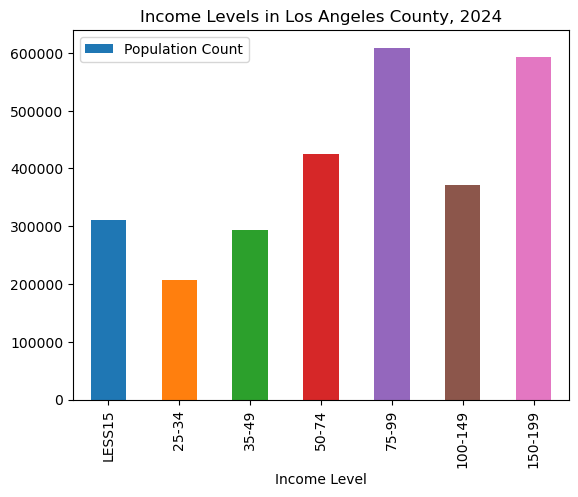

In [83]:
# Corrected code
tractsCleaned = pd.DataFrame({
    'Income Level': ['LESS15', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199'], 
    'Population Count': [310508, 207047, 292978, 425655, 609217, 371725, 593733],
    'Color': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
})
                                  
ax = tractsCleaned.plot.bar(
    x='Income Level', 
    y='Population Count', 
    title='Income Levels in Los Angeles County, 2024',
    color=tractsCleaned['Color']  
)  

plt.savefig("incomelevels.png")

In [100]:
# I will be importing LACOUNTYTRACTS24
censustracts=gpd.read_file('LACountyTracts24.zip')

In [101]:
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']


In [102]:
tractsCleaned = censustracts[columns_to_keep]

In [103]:
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

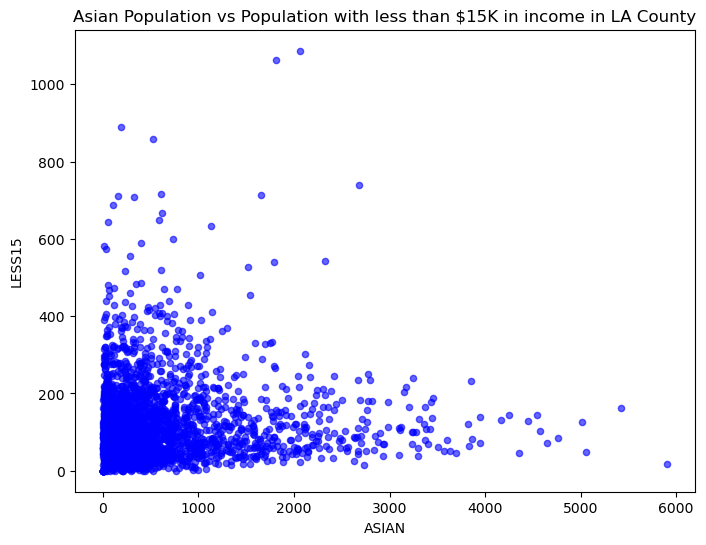

<Figure size 640x480 with 0 Axes>

In [104]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='ASIAN',
    y='LESS15',
    alpha=0.6,
    color='BLUE',
    figsize=(8,6)
)
plt.xlabel('ASIAN')
plt.ylabel('LESS15')
plt.title('Asian Population vs Population with less than $15K in income in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterPlotasian15less.png", bbox_inches='tight')

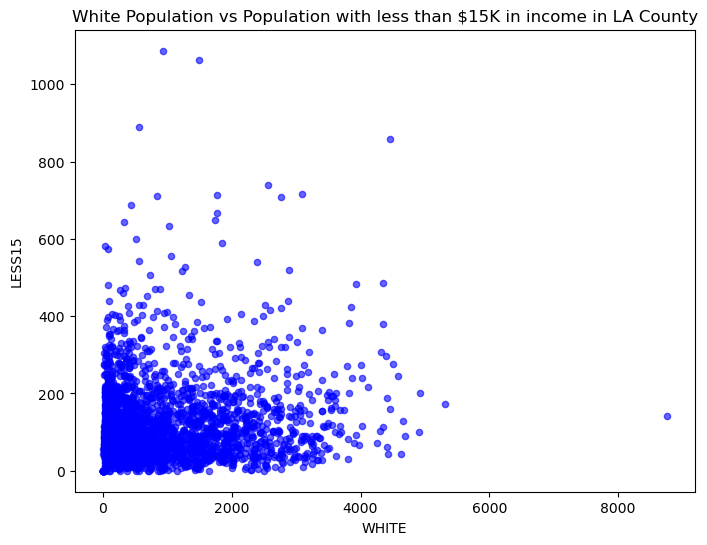

<Figure size 640x480 with 0 Axes>

In [106]:
# create static scatter plot
tractsCleaned.plot.scatter(
    x='WHITE',
    y='LESS15',
    alpha=0.6,
    color='BLUE',
    figsize=(8,6)
)
plt.xlabel('WHITE')
plt.ylabel('LESS15')
plt.title('White Population vs Population with less than $15K in income in LA County')
plt.grid(False)
plt.show()
plt.savefig("scatterWHITE.png", bbox_inches='tight')

#finish 
